## Introdução ao projeto

Neste projeto de análise iremos abordar diferentes games e diferentes plataformas de venda. Vamos realziar uma série de análises para descobrir:

* 		Quantos jogos foram lançados em anos diferentes Os dados de cada período são significativos?
* 		Como as vendas variaram de plataforma para plataforma. Escolha as plataformas com as maiores vendas totais e construa uma distribuição com base em dados para cada ano. Encontre as plataformas que costumavam ser populares, mas agora não têm vendas. Quanto tempo leva para as novas plataformas aparecerem e as antigas desaparecerem?
* 		Quais plataformas estão liderando em vendas? Quais estão crescendo ou diminuindo? Selecione várias plataformas potencialmente lucrativas.
* 		As vendas globais de todos os jogos, divididos por plataforma. As diferenças nas vendas são significativas? E quanto às vendas médias em várias plataformas? Descreva suas descobertas.
* 		Veja como as avaliações de usuários e profissionais afetam as vendas de uma plataforma popular (você escolhe). Construa um gráfico de dispersão e calcule a correlação entre revisões e vendas. Tire conclusões.
* 		Tendo suas conclusões em mente, compare as vendas dos mesmos jogos em outras plataformas.
* 		Distribuição geral de jogos por gênero. O que podemos dizer sobre os gêneros mais lucrativos? Você pode generalizar sobre gêneros com vendas altas e baixas?

Iremos testar algumas hipóteses, criando padrões e definindo parâmetros. As seguintes hipóteses serão testadas:

* 		As cinco plataformas principais. Descreva as variações das suas quotas de mercado de região para região.
* 		Os cinco principais gêneros. Explique a diferença.
* 		As classificações do ESRB afetam as vendas em regiões individuais?

Iremos passar pelas etapas de preparação de dados, análise de dados, teste de hipóteses. 

## Inicialização

Iremos carregar aqui todas as nossas bibliotecas necessárias e explicar o porquê.

Assim, iremos utilizar das bibliotecas:

pandas --> para criação de DataFrame e analises gerais;

numpy --> trabalhar com matemática e estatística avançada;

matplotlib --> trabalhar com geração dos gráficos;

scipy.stats --> trabalhar com testes de hipóteses de t de student e ANOVA;

seaborn --> gerar gráficos diferentes

In [1]:
# Carregando todas as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
import seaborn as sns

## Carregar dados

Nessa seção iremos ler nosso arquivo

In [2]:
# Carregando dados no computador pessoal
try:
    df = pd.read_csv(r'/Users/gabrielreus/Downloads/games.csv')
    
# Carregando dados no JupyterHub
except:
    df = pd.read_csv(r'/datasets/games.csv')

In [3]:
# Carregando informações iniciais de df
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
# Nome das colunas
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

**Conclusão Intermediária**

Algumas conclusões iniciais sobre os nossos dados são:

* O título não está em snake_case e necessitamos ajustar
* Já é possível observar valores nulos nas útlimas três colunas.
* A coluna de ano está em float ao invés de int;
* É possível que tenhamos duplicatas implícitas em name, é necessário análise posterior.

## Preparar os dados

Neste caso temos algumas bases de dados, iremos segmentar a análise e preparação dos dados por DataFrame criada para dar continuidade de maneira mais organizada.

Assim iremos passar pelas etapas para cada base de dados:

* Entender as informações gerais e resumidas
* Amostrar os dados
* Conclusões iniciais
* Correção dos dados encontrados;
* Adição de dados se necessário para o enriquecimento de dados.

### Explorando os dados iniciais

Na etapa anterior mostramos as informações de nossa df de maneira geral.

Nosso conjunto de dados contém colunas que não estão em snake_case. Iremos começar alterando as colunas para lowercase, pois este é o único "problema" encontrado nos padrões de dados.

É possível ver que há valores do tipo 'NaN' mas iremos abordar no próximo step. Também iremos análisar os tipos de dados.

In [5]:
# Transformar colunas para snake_case
df.columns = df.columns.str.lower()

# Mostrando df
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Big picture do tipo de dados

Vamos analisar os dados, por tipo e pelos nulos.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Como podemos ver iremos trabalhar com cada coluna individualmente, corrigindo os tipos de dados.

As colunas que iremos trabalhar e necessitam de alterações são:

* name;
* platform --> duplicatas implicitas;
* year_of_release
* critic_score;
* user_score;
* rating;

### Coluna - name

Nesta coluna temos 2 valores nulos. Iremos optar por eliminar estes valores, pois não irão afetar nossa análise final devido ao seu peso estatístico.

Fora isso, iremos análisar por duplicatas implícitas nos nomes dos games para ver se não há erros de digitação.

In [7]:
# Eliminando valores ausentes em name
df = df.dropna(subset=['name'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [9]:
# Vamos procurar por duplicatas implícitas
lista_name = list(df['name'].unique())

print(lista_name)

['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', 'Wii Sports Resort', 'Pokemon Red/Pokemon Blue', 'Tetris', 'New Super Mario Bros.', 'Wii Play', 'New Super Mario Bros. Wii', 'Duck Hunt', 'Nintendogs', 'Mario Kart DS', 'Pokemon Gold/Pokemon Silver', 'Wii Fit', 'Kinect Adventures!', 'Wii Fit Plus', 'Grand Theft Auto V', 'Grand Theft Auto: San Andreas', 'Super Mario World', 'Brain Age: Train Your Brain in Minutes a Day', 'Pokemon Diamond/Pokemon Pearl', 'Super Mario Land', 'Super Mario Bros. 3', 'Grand Theft Auto: Vice City', 'Pokemon Ruby/Pokemon Sapphire', 'Brain Age 2: More Training in Minutes a Day', 'Pokemon Black/Pokemon White', 'Gran Turismo 3: A-Spec', 'Call of Duty: Modern Warfare 3', 'Pokémon Yellow: Special Pikachu Edition', 'Call of Duty: Black Ops 3', 'Call of Duty: Black Ops', 'Pokemon X/Pokemon Y', 'Call of Duty: Black Ops II', 'Call of Duty: Modern Warfare 2', 'Grand Theft Auto III', 'Super Smash Bros. Brawl', 'Mario Kart 7', 'Animal Crossing: Wild World', 'Halo 3', '

Podemos ver que há muitos nomes diferentes na coluna name para os games, indicando uma grande quantidade de dados. Não seria inteligente analisar um por um. 

Iremos, para facilitar, deixar todos os nomes em letras minúsculas. Isso ajudará no próximo teste/análise.

Por tanto, iremos escolher 3 grandes games que são conhecidos e imprimir valores únicos para eles. Iremos buscar para nomes únicos que contenham:

* GTA / Grand Theft Auto
* FIFA;
* Mario;

In [10]:
# transformando nomes de games para minusculo
df['name'] = df['name'].str.lower()

In [11]:
# Busca por "gta"
resultados_gta = df[df['name'].str.contains('gta')]['name'].unique()
resultados_gta.sort()

print(resultados_gta)

# Busca por "grand theft"
resultados_grand_theft = df[df['name'].str.contains('grand theft')]['name'].unique()
resultados_grand_theft.sort()

print(resultados_grand_theft)

[]
['grand theft auto' 'grand theft auto 2' 'grand theft auto iii'
 'grand theft auto iv' 'grand theft auto v'
 'grand theft auto: chinatown wars'
 'grand theft auto: liberty city stories'
 'grand theft auto: mission pack #1, london 1969'
 'grand theft auto: san andreas' 'grand theft auto: vice city'
 'grand theft auto: vice city stories'
 'rockstar games double pack: grand theft auto iii & grand theft auto vice city']


In [12]:
# Busca por "fifa"
resultados_fifa = df[df['name'].str.contains('fifa')]['name'].unique()
resultados_fifa.sort()

print(resultados_fifa)

['2002 fifa world cup' '2010 fifa world cup south africa'
 '2014 fifa world cup brazil' 'fifa 06 soccer'
 'fifa 06: road to fifa world cup' 'fifa 12' 'fifa 14' 'fifa 15' 'fifa 16'
 'fifa 17' 'fifa 2000' 'fifa 2001 major league soccer'
 'fifa 2001: major league soccer' 'fifa 99' 'fifa manager 12'
 'fifa soccer' 'fifa soccer 06' 'fifa soccer 07' 'fifa soccer 08'
 'fifa soccer 09' 'fifa soccer 09 all-play' 'fifa soccer 10'
 'fifa soccer 11' 'fifa soccer 13' 'fifa soccer 2002' 'fifa soccer 2003'
 'fifa soccer 2003 (weekly jp sales)' 'fifa soccer 2004'
 'fifa soccer 2005' 'fifa soccer 64' 'fifa soccer 96' 'fifa soccer 97'
 'fifa soccer world championship' 'fifa street' 'fifa street 2'
 'fifa street 3' 'fifa world cup germany 2006'
 'fifa world cup: germany 2006' 'fifa: road to  world cup 98'
 'fifa: road to world cup 98' 'project fifa world cup']


In [13]:
# Busca por "mario"
resultados_mario = df[df['name'].str.contains('mario')]['name'].unique()
resultados_mario.sort()

print(resultados_mario)

['classic nes series: dr. mario' 'classic nes series: super mario bros.'
 'dance dance revolution: mario mix'
 'dance dance revolution: mario mix (jp sales)'
 'detective conan: marionette symphony' 'dr. mario'
 'dr. mario / puzzle league' 'dr. mario 64' 'famicom mini: mario bros.'
 'famicom mini: super mario bros. 2'
 "mario & luigi: bowser's inside story" 'mario & luigi: dream team'
 'mario & luigi: paper jam'
 'mario & luigi: paper jam & mario kart 7 double pack'
 'mario & luigi: partners in time' 'mario & luigi: superstar saga'
 'mario & sonic at the london 2012 olympic games'
 'mario & sonic at the olympic games'
 'mario & sonic at the olympic winter games'
 'mario & sonic at the rio 2016 olympic games'
 'mario & sonic at the sochi 2014 olympic winter games' 'mario & wario'
 'mario bros.' 'mario golf' 'mario golf: advance tour'
 'mario golf: toadstool tour' 'mario golf: world tour'
 'mario hoops 3 on 3' 'mario kart 64' 'mario kart 7' 'mario kart 8'
 'mario kart ds' 'mario kart wii'

**Conclusão**

Como podemos ver, havia poucos valores nulos para coluna name que foram eliminados devido ao baixo tamanho e pouco impcato estatístico.

Além disso, fez-se a análise de duplicatas implícitas. Descobrimos que o número de jogos/nomes são muitos, assim realizou-se teste em algumas amostras de nomes para verificação da escrita para análise se havia ou não duplicatas implícitas. 

De primeiro momento, com os exemplos escolhidos, não pode-se perceber que haviam tal problema. Assim, decidiu-se por seguir com os próximos passos.

### Coluna - platform

Iremos analisar as duplicatas implicitas possíveis nesse caso.

A coluna não tem a presença de valores nulos. Para tal, iremos verificar os valores únicos encontrandos na coluna platform e analisar o que encontramos.

In [14]:
# valores únicos em platform
plataformas = list(df['platform'].unique())
plataformas.sort()

print(plataformas)

['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG', 'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360', 'XB', 'XOne']


**Conclusão**

Ao que indica, todos os dados estão corretos. Não há valores nulos e não parecem conter duplicatas implícitas nesta coluna. Iremos seguir com a próxima coluna.

### Coluna - year_of_release

Nesta colunas temos a presença de alguns valores nulos. Além disso, o tipo de dados está incorreto, dado que anos são somente números inteiros.

Iremos, primeiramente, analisar os dados que faltam para decidir se iremos ou não substituir os valores e depois iremos alterar o dtype de float para int.

Para tal, iremos criar uma lista de nomes de jogos em que a coluna 'year_of_release' seja nula. e primeiramente, iremos criar uma df para analisar os dados com a mesma condição.

In [15]:
# df filtrada com condição nula para year_of_release
df_filtro = df.loc[df['year_of_release'].isnull()]

df_filtro.head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,fifa soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,lego batman: the videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe smackdown vs. raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,space invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,rock band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,frogger's adventures: temple of the frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
678,lego indiana jones: the original adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
719,call of duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
805,rock band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


Agora, iremos verificar se os três primeiros jogos tem outros valores, assim poderemos encontrar outras linhas que poderão auxiliar na substituição dos dados.

Vamos gerar 3 dfs para os tres primeiros nomes de jogos da df_filtrada gerada.

In [16]:
# gerando df com somente madden nfl 2004
df[df['name'] == 'madden nfl 2004'].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
1881,madden nfl 2004,XB,2003.0,Sports,1.02,0.02,0.00,0.05,92.0,8.3,E
3889,madden nfl 2004,GC,2003.0,Sports,0.40,0.10,0.00,0.01,94.0,7.7,E
5708,madden nfl 2004,GBA,2003.0,Sports,0.22,0.08,0.00,0.01,70.0,6.6,E


In [17]:
# gerando df com somente madden fifa soccer 2004
df[df['name'] == 'fifa soccer 2004'].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
377,fifa soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
2606,fifa soccer 2004,XB,2003.0,Sports,0.24,0.49,0.00,0.05,82.0,8.2,E
12029,fifa soccer 2004,GC,2003.0,Sports,0.05,0.01,0.00,0.00,83.0,6.2,E
13086,fifa soccer 2004,GBA,2003.0,Sports,0.04,0.01,0.00,0.00,82.0,7.9,E


In [18]:
# gerando df com somente lego batman: the videogame
df[df['name'] == 'lego batman: the videogame'].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
397,lego batman: the videogame,X360,2008.0,Action,2.04,1.02,0.0,0.32,76.0,7.9,E10+
456,lego batman: the videogame,Wii,NaN,Action,1.80,0.97,0.0,0.29,74.0,7.9,E10+
460,lego batman: the videogame,DS,2008.0,Action,1.75,1.01,0.0,0.29,72.0,8,E10+
1519,lego batman: the videogame,PS3,2008.0,Action,0.72,0.39,0.0,0.19,75.0,7.7,E10+
1538,lego batman: the videogame,PSP,NaN,Action,0.57,0.44,0.0,0.27,73.0,7.4,E10+
1553,lego batman: the videogame,PS2,2008.0,Action,0.72,0.03,0.0,0.52,77.0,8.9,E10+
12465,lego batman: the videogame,PC,2008.0,Action,0.02,0.03,0.0,0.01,80.0,7.8,E10+


**Conclusão Intermediária**

Como podemos ver, os jogos tem a tendência de serem disponibilizados no mesmo ano em várias plataformas. Dessa maneira podemos substituir os valores nulos por outros que apareçam no disponíveis em outras plataformas e que contenham o dados do ano.

Iremos então, escrever uma função que localiza o valor nulo e, pega outros idênticos a ele calcula a moda e substitui o valor pela moda, assim iremos substiutir o valor pela possibilidade mais provável.

In [19]:
# substituindo valores nulos de ano em df

# Calcular a moda de year condicional ao name
mode_by_name = df.groupby('name')['year_of_release'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)

# Preencher os valores nulos de year com a moda condicional ao name
df['year_of_release'] = df['year_of_release'].fillna(df['name'].map(mode_by_name))

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16567 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


**Conclusão Intermediária**

Podemos ver que ainda há valores nulos que, provavelmente, são games que só foram lançados ou temos dados de uma plataforma só.

Vamos verificar essa hipótese e também validar que nossos dados dos jogos fifa, lego e madden foram corrigidos.

In [20]:
# gerando df com somente lego batman: the videogame
df[df['name'] == 'lego batman: the videogame'].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
397,lego batman: the videogame,X360,2008.0,Action,2.04,1.02,0.0,0.32,76.0,7.9,E10+
456,lego batman: the videogame,Wii,2008.0,Action,1.80,0.97,0.0,0.29,74.0,7.9,E10+
460,lego batman: the videogame,DS,2008.0,Action,1.75,1.01,0.0,0.29,72.0,8,E10+
1519,lego batman: the videogame,PS3,2008.0,Action,0.72,0.39,0.0,0.19,75.0,7.7,E10+
1538,lego batman: the videogame,PSP,2008.0,Action,0.57,0.44,0.0,0.27,73.0,7.4,E10+
1553,lego batman: the videogame,PS2,2008.0,Action,0.72,0.03,0.0,0.52,77.0,8.9,E10+
12465,lego batman: the videogame,PC,2008.0,Action,0.02,0.03,0.0,0.01,80.0,7.8,E10+


In [21]:
# gerando df com somente madden fifa soccer 2004
df[df['name'] == 'fifa soccer 2004'].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
377,fifa soccer 2004,PS2,2003.0,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
2606,fifa soccer 2004,XB,2003.0,Sports,0.24,0.49,0.00,0.05,82.0,8.2,E
12029,fifa soccer 2004,GC,2003.0,Sports,0.05,0.01,0.00,0.00,83.0,6.2,E
13086,fifa soccer 2004,GBA,2003.0,Sports,0.04,0.01,0.00,0.00,82.0,7.9,E


In [22]:
# gerando df com somente madden nfl 2004
df[df['name'] == 'madden nfl 2004'].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,PS2,2003.0,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
1881,madden nfl 2004,XB,2003.0,Sports,1.02,0.02,0.00,0.05,92.0,8.3,E
3889,madden nfl 2004,GC,2003.0,Sports,0.40,0.10,0.00,0.01,94.0,7.7,E
5708,madden nfl 2004,GBA,2003.0,Sports,0.22,0.08,0.00,0.01,70.0,6.6,E


In [23]:
# df filtrada com condição nula para year_of_release
df_filtro = df.loc[df['year_of_release'].isnull()]

df_filtro.head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
475,wwe smackdown vs. raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
627,rock band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,frogger's adventures: temple of the frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
805,rock band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T
1142,rock band,PS3,NaN,Misc,0.99,0.41,0.00,0.22,92.0,8.4,T
1301,triple play 99,PS,NaN,Sports,0.81,0.55,0.00,0.10,NaN,NaN,NaN
1506,adventure,2600,NaN,Adventure,1.21,0.08,0.00,0.01,NaN,NaN,NaN
1585,combat,2600,NaN,Action,1.17,0.07,0.00,0.01,NaN,NaN,NaN
1840,rock band,PS2,NaN,Misc,0.71,0.06,0.00,0.35,82.0,6.8,T
1984,legacy of kain: soul reaver,PS,NaN,Action,0.58,0.40,0.00,0.07,91.0,9,T


Vamos verificar agora se os valores nulos se comportam como nós havíamos previsto, em que os anos que não foram substituidos estão somente em uma plataforma.

In [24]:
# gerando df com somente wwe
df[df['name'] == 'wwe smackdown vs. raw 2006'].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
475,wwe smackdown vs. raw 2006,PS2,NaN,Fighting,1.57,1.02,0.0,0.41,NaN,NaN,NaN


In [25]:
# gerando df com somente madden nfl 2004
df[df['name'] == 'yakuza 4'].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2169,yakuza 4,PS3,NaN,Action,0.15,0.13,0.63,0.05,78.0,8,M


Podemos ver que os valores não substituidos são, de fato, valores que são únicos e não temos como substituilos com a nossa base de dados, assim iremos retirar os valores nulos que restaram e transormar nossos dados para o tipo int.

In [26]:
# retirando nulos restantes
df = df.dropna(subset=['year_of_release'])

# transformando de float para int
df.loc[:, 'year_of_release'] = df['year_of_release'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  int64  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     8075 non-null   float64
 9   user_score       9934 non-null   object 
 10  rating           9868 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


Iremos realizar uma última checagem por valores atípicos, assim teremos certeza que nossos dados estão corretos. Faremos isso via a análise de distribuição dos dados do ano.

<AxesSubplot:>

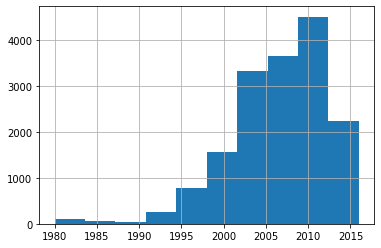

In [27]:
# histograma de distribuição - v1
df['year_of_release'].hist()

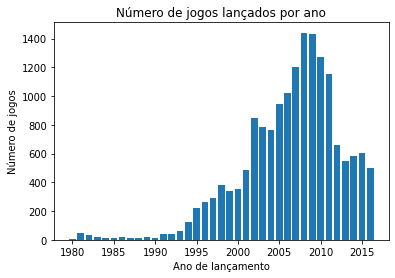

In [28]:
# contar número de jogos por ano - v2
jogos_por_ano = df.groupby('year_of_release')['name'].count()

# criar gráfico de barras
plt.bar(jogos_por_ano.index, jogos_por_ano.values)

# configurar título e rótulos dos eixos
plt.title('Número de jogos lançados por ano')
plt.xlabel('Ano de lançamento')
plt.ylabel('Número de jogos')

# exibir o gráfico
plt.show()

**Conclusão**

Como podemos ver, pudemos substituir alguns dados de ano utilizando os anos do mesmo jogo porem em plataformas diferentes.

Utilizamos a moda para realizar a substituição, pois seria o valor que mais aparece e tem a maior tendência estatística. Apesar disso, vimos que os jogos são lançados em diferentes plataformas no mesmo ano, normalmente.

Além disso, haviam dados que não puderam ser subsituidos porque estavam somente em uma plataforma e assim tivemos que retirar de nossa análise.

Os dados parecem estar corretos sem erros, pois o ano mais antigo é de 1980, plausível para games.

### Coluna - critic_score

A coluna contem grande quantidade de valores nulos presentes. Iremos analisar os dados nulos e dados não nulos da coluna para encontrar algum modo de substituir os valores, pois os nulos nesta coluna representam, aproximadamente, 50% dos nossos dados.

Agora iremos gerar os dados de df com nulos em critic_score e sem nulos. Iremos gerar histogramas para analisar a distribuição.

Pontuação máxima é de 100 pontos, iremos checar se existem erros de pontuação fora do padrão máximo.

In [29]:
# valores únicos em critic_score
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 13.])

In [30]:
# df filtrada com condição nula para year_of_release
df_filtro2 = df.loc[df['critic_score'].isnull()]

df_filtro2.head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,super mario bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,pokemon red/pokemon blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,duck hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,pokemon gold/pokemon silver,GB,1999,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,super mario world,SNES,1990,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,pokemon diamond/pokemon pearl,DS,2006,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,super mario land,GB,1989,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,super mario bros. 3,NES,1988,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


In [31]:
# vamos analisar os três primeiros jogos em nossa df

# gerando df com somente super mario bros.
df[df['name'] == 'super mario bros.'].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,super mario bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
201,super mario bros.,GB,1999,Platform,3.40,1.30,0.15,0.22,NaN,NaN,NaN


In [32]:
# gerando df com somente pokemon omega ruby/pokemon alpha sapphire
df[df['name'] == 'pokemon omega ruby/pokemon alpha sapphire'].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
47,pokemon omega ruby/pokemon alpha sapphire,3DS,2014,Role-Playing,4.35,3.49,3.1,0.74,NaN,NaN,NaN


In [33]:
# gerando df com somente pokemon omega ruby/pokemon alpha sapphire
df[df['name'] == 'call of duty: black ops 3'].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
31,call of duty: black ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN
99,call of duty: black ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,NaN
1049,call of duty: black ops 3,X360,2015,Shooter,1.14,0.40,0.00,0.16,NaN,NaN,NaN
1062,call of duty: black ops 3,PS3,2015,Shooter,0.49,0.87,0.07,0.26,NaN,NaN,NaN
6463,call of duty: black ops 3,PC,2015,Shooter,0.00,0.25,0.00,0.01,NaN,NaN,NaN


In [34]:
# gerando df com somente pokemon omega ruby/pokemon alpha sapphire
df[df['name'] == 'nintendogs'].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
10,nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


Como podemos ver, há dados que não iremos conseguir substituir, porque como na outra análise só contem um dado e assim não poderemos gerar análises estatísticas. Isso deve ocorrer, porque o jogo deve ter sido lançado em somente uma plataforma.

Iremos, para generalizar gerar um histograma para a coluna critic_score e análisar a maneira que devemos realizar a substituição.

<AxesSubplot:>

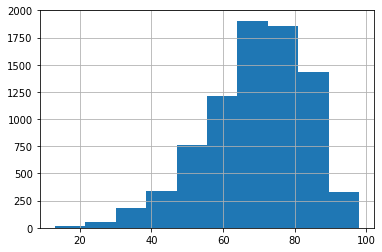

In [35]:
# gerando histograma - v1
df['critic_score'].hist()

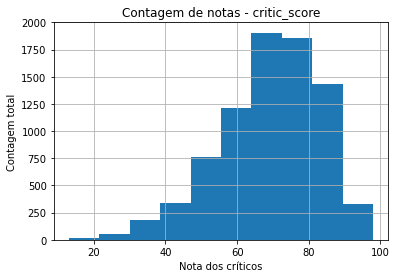

In [36]:
# gerando histograma - v2
df['critic_score'].hist()

# configurar título e rótulos dos eixos
plt.title('Contagem de notas - critic_score')
plt.xlabel('Nota dos críticos')
plt.ylabel('Contagem total')

# exibir o gráfico
plt.show()

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  int64  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     8075 non-null   float64
 9   user_score       9934 non-null   object 
 10  rating           9868 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


Como podemos ver no histograma geral de distribuição, a coluna tem uma distribuição não normal. 

Iremos generalizar a análise para os clusters de nomes e utilizar a médiana dos valores para substituir os valores e analisar quantos dados conseguimos recuperar.

In [38]:
# substituindo valores nulos de critic_score em df

# Calcular a mediana de user_score condicional ao name
median_by_name = df.groupby('name')['critic_score'].agg(lambda x: x.median() if not np.isnan(x).all() else None)

# Preencher os valores nulos de user_score com a mediana condicional ao name
df['critic_score'] = df['critic_score'].fillna(df['name'].map(median_by_name))

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  int64  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     9035 non-null   float64
 9   user_score       9934 non-null   object 
 10  rating           9868 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


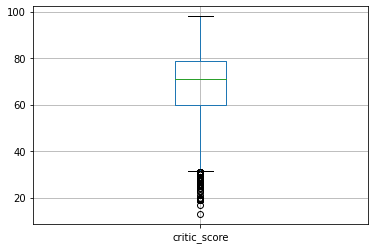

In [39]:
# verificando a distribuição da pontuação
df.boxplot(column='critic_score')

plt.show()


**Conclusão**

Podemos ver que a maior parte dos valores nulos são presentes em todas as plataformas.

É um volume de dados muito alto, poderíamos procurar outras bases de dados para coletar dados para retirar esses valores, mas nesse projeto não iremos aprofundar tanto.

Por tanto, iremos deixar os valores como Nulos para não retirar grande parte de nossos dados, pois futuramente iremos necessitar para outras análises que não utilizam a coluna.

Pelo que vemos nos dados, os que não pudemos substituir são games que:

* Não possuem rating nenhum de players por, talvez, erro na compilação de dados ou por não serem muito famosos;
* Os games são muito antigos e não tem nenhum rating pela idade;
* Somente foram lançados em 1 plataforma assim não pudemos realizar a substituição e não havia o dado disponível;

Pelo box gerado não parecem ter dados errados, visto que não tem negativos nem ultrapassam o máximo de 100.

### Coluna - user_score

A coluna contem grande quantidade de valores nulos presentes. Iremos analisar os dados nulos e dados não nulos da coluna para encontrar algum modo de substituir os valores, pois os nulos nesta coluna representam, aproximadamente, 40% dos nossos dados.

Agora iremos gerar os dados de df com nulos em user_score e sem nulos. Iremos gerar histogramas para analisar a distribuição.

A pontuação máxima é 10, iremos analisar se não há dados que passem desse limite nem negativos.

In [40]:
# valores únicos em user_score
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [41]:
# df filtrada com condição nula para year_of_release
df_filtro3 = df.loc[df['user_score'].isnull()]

df_filtro3.head(20) 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,super mario bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,pokemon red/pokemon blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,duck hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,pokemon gold/pokemon silver,GB,1999,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,super mario world,SNES,1990,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,pokemon diamond/pokemon pearl,DS,2006,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,super mario land,GB,1989,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,super mario bros. 3,NES,1988,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


In [42]:
# gerando df com somente super mario all-stars
df[df['name'] == 'super mario all-stars'].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
56,super mario all-stars,SNES,1993,Platform,5.99,2.15,2.12,0.29,NaN,NaN,NaN


In [43]:
# gerando dados que contem tbd
df[df['user_score'] == 'tbd'].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,zumba fitness,Wii,2010,Sports,3.45,2.59,0.00,0.66,42.0,tbd,E
301,namco museum: 50th anniversary,PS2,2005,Misc,2.08,1.35,0.00,0.54,61.0,tbd,E10+
520,zumba fitness 2,Wii,2011,Sports,1.51,1.03,0.00,0.27,NaN,tbd,T
645,udraw studio,Wii,2010,Misc,1.65,0.57,0.00,0.20,71.0,tbd,E
718,just dance kids,Wii,2010,Misc,1.52,0.54,0.00,0.18,NaN,tbd,E
726,dance dance revolution x2,PS2,2009,Simulation,1.09,0.85,0.00,0.28,NaN,tbd,E10+
821,the incredibles,GBA,2004,Action,1.15,0.77,0.04,0.10,55.0,tbd,E
881,who wants to be a millionaire,PC,1999,Misc,1.94,0.00,0.00,0.00,NaN,tbd,E
1047,tetris worlds,GBA,2001,Puzzle,1.25,0.39,0.00,0.06,65.0,tbd,E
1048,imagine: teacher,DS,2008,Simulation,0.70,0.82,0.00,0.19,NaN,tbd,E


In [44]:
# gerando df com somente zumba fitness
df[df['name'] == 'zumba fitness'].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,zumba fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,42.0,tbd,E
669,zumba fitness,X360,2010,Sports,1.74,0.45,0.0,0.18,42.0,5.5,E
3516,zumba fitness,PS3,2010,Sports,0.28,0.21,0.0,0.08,42.0,3.8,E


**Conclusão**

Pode-se observar que há uma relação entre os valores nulos entre as colunas de score e rating. É importante citar que há valores que são nulos em critic score, mas não em user score.

Iremos gerar um histograma dos dados de user_score para analisar como é distribuido e depois decidir por algum método de substituição. 

Vamos testar e ver se é efetivo, pois se não há muitos dados diferentes plataformas dos nomes com a coluna preenchida, não teremos como substituir.

Além disso, é possível observar que há dados com o valor chamado de TBD, em inglês significa to be defined. Iremos utilizar do mesmo método anterior para realizar a substiuição dos valores com TBD.

<AxesSubplot:>

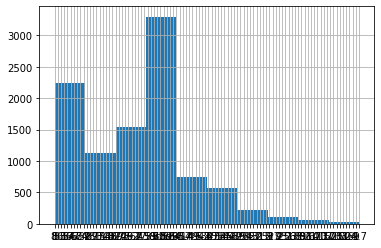

In [45]:
# gerando histograma - v1
df['user_score'].hist()

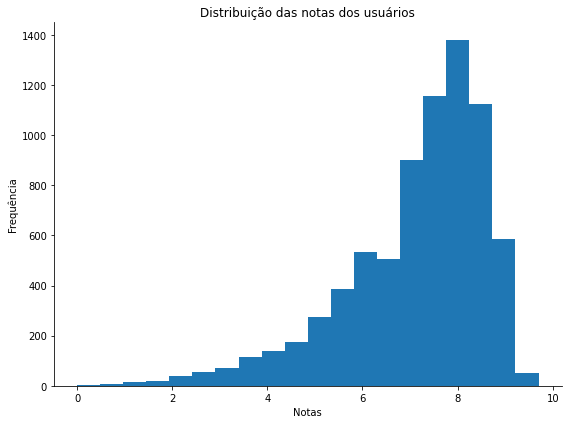

In [46]:
# gerando histograma - v2

# convertendo a coluna user_score para float
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

# criando figura e subplots
fig, ax = plt.subplots(figsize=(8, 6))

# plotando histograma
ax.hist(df['user_score'].dropna(), bins=20)

# configurando título e rótulos dos eixos
ax.set_title('Distribuição das notas dos usuários')
ax.set_xlabel('Notas')
ax.set_ylabel('Frequência')

# removendo linhas de grade desnecessárias
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# ajustando layout
fig.tight_layout()

# exibindo o gráfico
plt.show()


Iremos então utilizar a mediana para tentar substituir os valores ausentes nas colunas nulas, visto que a coluna não possuí uma distribuição normalizada.

In [47]:
# gerando informações em df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  int64  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     9035 non-null   float64
 9   user_score       7540 non-null   float64
 10  rating           9868 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Para facilitar nosso código, iremos transformar os dados com 'TBD'para o tipo NaN, assim tratamos ele como se fosse nulo e realizamos somente um código de substituição. Iremos tratar os dados assim, porque o To Be Defined não tem valor neste momento, então logicamente também é nulo.

In [48]:
# Substituir 'tbd' por np.nan
df['user_score'] = df['user_score'].replace('tbd', np.nan)

In [49]:
# Converter user_score para float
df['user_score'] = df['user_score'].astype(float)

In [50]:
# substituindo valores nulos de user_score em df

# Calcular a mediana de user_score condicional ao name
median_by_name = df.groupby('name')['user_score'].agg(lambda x: x.median() if not np.isnan(x).all() else None)

# Preencher os valores nulos de user_score com a mediana condicional ao name
df['user_score'] = df['user_score'].fillna(df['name'].map(median_by_name))

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  int64  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     9035 non-null   float64
 9   user_score       8639 non-null   float64
 10  rating           9868 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


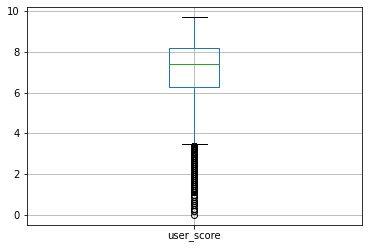

In [51]:
# verificando a distribuição da pontuação - v1
df.boxplot(column='user_score')

plt.show()

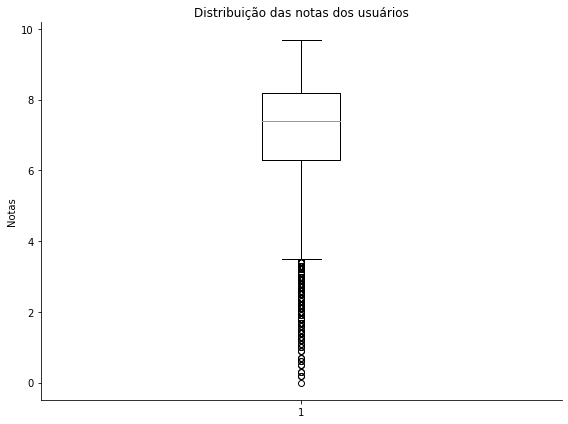

In [52]:
# verificando a distribuição da pontuação - v2

# criando figura e subplots
fig, ax = plt.subplots(figsize=(8, 6))

# plotando boxplot
ax.boxplot(df['user_score'].dropna())

# configurando título e rótulos dos eixos
ax.set_title('Distribuição das notas dos usuários')
ax.set_ylabel('Notas')

# removendo linhas de grade desnecessárias
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# ajustando layout
fig.tight_layout()

# exibindo o gráfico
plt.show()

In [53]:
df[df['user_score'] < 0]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


**Conclusão Final**

Como em critic_score tivemos os mesmos problemas para substituição dos valores.

Através da nossa técnica de substituição conseguimos recuperar uma quantidade considerável de dados também, mas ainda continuamos com muitos dados faltantes.

Iremos deixar estes dados da mesma maneira, com nulos, pois caso tirassemos de nossa análise teriamos uma remoção muito grande de dados. Como em critic score podemos ter dados faltantes pois:

* Não possuem rating nenhum de players por, talvez, erro na compilação de dados ou por não serem muito famosos;
* Os games são muito antigos e não tem nenhum rating pela idade;
* Somente foram lançados em 1 plataforma assim não pudemos realizar a substituição e não havia o dado disponível;

Podemos ver que há menos valores disponíveis depois de nossas substituições do que antes, isso ocorre porque haviam muitos dados com TBD que não puderam ser substituidos em nossa análise.

Iremos deixar estes valores nulos, pois o volume de dados faltante é alto e irá afetar outras análises que iremos fazer posteriormente que não necessitam desta coluna de nossa df.

Os dados parecem estar corretos, pois não ultrapassam os limites inferior de 0 e superior de 10.

### Coluna - rating

A coluna rating é de tipo qualitativa, não temos número efetivos. A classificação é feita de maneira de letras conforme um padrão de rating.

Iremos analisar as colunas rating nulas, os diferentes tipos de rating. Pode-se ver previamente que há um grande volume de dados faltantes. Iremos analisar os valores únicos primeiramente e a df com valores nulos.

In [54]:
# valores únicos em rating
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [55]:
# df filtrada com condição nula para rating
df_filtro4 = df.loc[df['rating'].isnull()]

df_filtro4.head(20) 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,super mario bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,pokemon red/pokemon blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,duck hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,pokemon gold/pokemon silver,GB,1999,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,super mario world,SNES,1990,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,pokemon diamond/pokemon pearl,DS,2006,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,super mario land,GB,1989,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,super mario bros. 3,NES,1988,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


Sabe-se que o rating ESRB é a classificação de jogos, a organização também impõe regras para publicidade e de privacidade online no mercado dos jogos eletrônicos.

Procurando um pouco sobre, pode-se entender que ela classifica a faixa etária que o jogo é indicado. Com essa informação, podemos correlacionar que a classificação pode ter influência do gênero do jogo, assim iremos realizar testes clusterizando os diferentes gêneros para análisar se há uma correlação entre ambos.

Iremos categorizar os gêneros com número e rating com números também e realizar um teste de correlação. Além disso gerar df agrupadas com contagem de rating para cada tipo de genre.

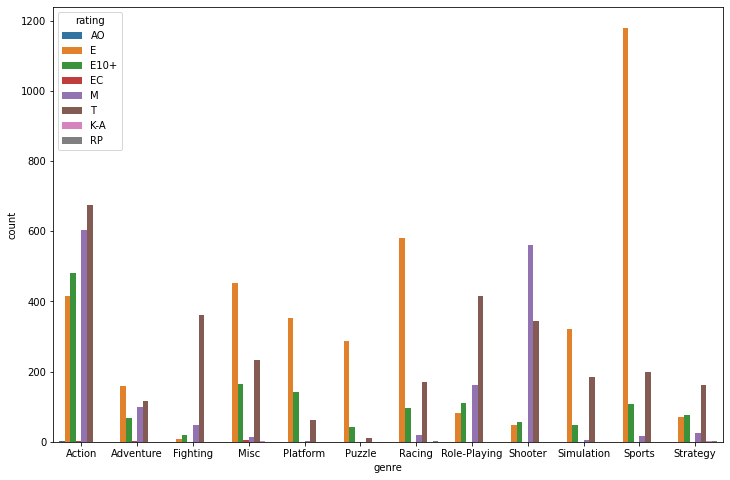

In [56]:
# Criar um dataframe a partir da contagem de jogos por gênero e classificação
df_test = df.groupby(by=['genre','rating'])['rating'].count().reset_index(name='count')

# Gerar a figura do Matplotlib
fig, ax = plt.subplots(figsize=(12, 8))

# Gerar o gráfico de barras empilhadas usando o Seaborn
sns.barplot(x='genre', y='count', hue='rating', data=df_test, ax=ax)

# Mostrar o gráfico
plt.show()

**Conclusão Intermediária**

Podemos ver que a nossa hipótese que de que os diferentes genêros teriam ratings parecidos não é válido para todos os casos, tendo generos como 'Action' muito bem distribuido. O único genero que tem grande número de ocorrências iguais é o 'Sports'.

Com o gráfico gerado, pode-se ver que não seria prudente realizar a substituição utilizando o parâmetro gênero como base para substituição de valores. Sendo assim, não iremos realizar a substituição.

Em base a df gerada, geramos a premissa que talvez os dados não tenham rating por serem mais antigos e não estar dentor da classificação. Para isso geraremos um histograma de year_of_release em nossa df_filtrada4 para análise.

<AxesSubplot:>

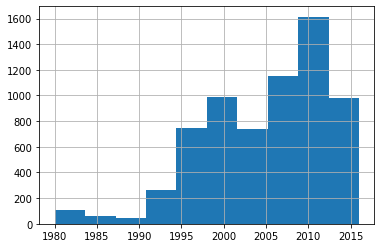

In [57]:
# gerando histograma com year_of_release - v1
df_filtro4['year_of_release'].hist()

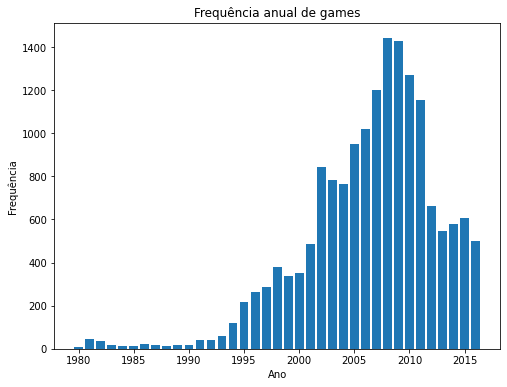

In [58]:
# gerando histograma com year_of_release - v2

# criando figura e subplots
fig, ax = plt.subplots(figsize=(8, 6))

# contar frequência por ano - v2
count_ano = df.groupby(by='year_of_release')['name'].count()

# criar gráfico de barras
plt.bar(count_ano.index, count_ano.values)

# configurar título e rótulos dos eixos
plt.title('Frequência anual de games')
plt.xlabel('Ano')
plt.ylabel('Frequência')

# exibir o gráfico
plt.show()


**Conclusão Intermediária**

Como podemos ver, novamente nossa premissa não se demonstra válida, pois pelo histograma gerado pode-se observar que a maior incidência de valores nulos em rating se concentram em anos mais perto do final (2016). Assim, pode-se ver que os dados realmente não tem haver com a idade do jogo.

Pode-se concluir então que os dados não foram compilados na base de dados por erros ou por, na base de dados utilizada, não possuirem a informação devida para os games que ali estavam.

O que podemos tentar como última tentativa, é realizar um método de substituição parecido com o que fizemos anteriormente, e iremos utilizar uma iteração sobre os nomes para tentar substituir o rating. 

Para tal, iremos considerar que o rating não muda de plataforma para plataforma para o mesmo game.

In [59]:
# gerando info de df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  int64  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     9035 non-null   float64
 9   user_score       8639 non-null   float64
 10  rating           9868 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [60]:
# substituindo valores nulos de ano em df

# Calcular a moda de year condicional ao name
mode_by = df.groupby('name')['rating'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)

# Preencher os valores nulos de year com a moda condicional ao name
df['rating'] = df['rating'].fillna(df['name'].map(mode_by))

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  int64  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     9035 non-null   float64
 9   user_score       8639 non-null   float64
 10  rating           10305 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [61]:
# valores únicos em rating
df['rating'].unique()

array(['E', None, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

**Conclusão**

Pode-ser ver que conseguimos recuperar alguns dados através da substituição clusterizada por nome como fizemos em outras colunas. O valor NaN foi para None, são parecidos, sendo o NaN para valores matemáticos e None em strings.

Como usamos substituição em strings o valor foi convertido de NaN para None.

Podemos observar, ainda, que os valores de rating não seguiram nossas premissas de genre nem da idade para explicar a sua ausência e talvez padrão. Ou seja, os dados não estão completos não pela idade dos games e sim por falta de dados ao buscar a base de dados. E o genero do game não Influência na sua classificação.

### Coluna - adição de coluna total_rev

Iremos realizar novamente uma verificação geral e gerar nossa df para análise e adicionar uma coluna chamada de total_rev que é o somatório das vendas nas regiões.

Antes disso iremos analisar novamente nossa df para ver se todas as colunas estão corretas, principalmente nos tipos.

In [62]:
# gerando amostra de df
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,super mario bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,None
2,mario kart wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,pokemon red/pokemon blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,None
16711,lma manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,None
16712,haitaka no psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,None
16713,spirits & spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,None


In [63]:
# info de df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  int64  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     9035 non-null   float64
 9   user_score       8639 non-null   float64
 10  rating           10305 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


**Conclusão Intermediária**

Como podemos ver nossos dados estão com todos os tipos corretos para todas as colunas.

Agora iremos realizar a criação da coluna total_rev em df, somando todas as colunas de sales

In [64]:
# Gerando coluna total_rev
df['total_rev'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

# gerando df
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_rev
0,wii sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,None,40.24
2,mario kart wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,None,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,None,0.01
16711,lma manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,None,0.01
16712,haitaka no psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,None,0.01
16713,spirits & spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,None,0.01


### Conclusão

Em conclusão, realizamos uma análise completa da base de dados, buscando identificar e tratar os valores faltantes, substituindo-os por valores adequados sempre que possível. Notamos que alguns valores não puderam ser substituídos devido a falta de informações disponíveis ou a impossibilidade de encontrar padrões claros na base de dados.

Apesar de não termos conseguido substituir todos os valores faltantes, decidimos manter a coluna com valores nulos para não comprometer o volume de dados de nossa análise. Realizamos também a análise de duplicatas implícitas, mas não encontramos evidências claras de sua existência.

Em resumo, a análise realizada nos permitirá prosseguir com as próximas etapas do projeto, buscando entender melhor a relação entre as diferentes variáveis presentes na base de dados e suas influências sobre as vendas dos jogos.

Pode-se ver que a substituição via clusterização por nome foi efetiva e gerou resultados significativos.

## Analisando os dados

Agora que limpamos os dados iremos começar a trabalhar com nossos dados gerando as análises necessárias.

Iremos trabalhar com as seguintes análises - relembrando - :

* 		Quantos jogos foram lançados em anos diferentes Os dados de cada período são significativos?
* 		Como as vendas variaram de plataforma para plataforma. Escolha as plataformas com as maiores vendas totais e construa uma distribuição com base em dados para cada ano. Encontre as plataformas que costumavam ser populares, mas agora não têm vendas. Quanto tempo leva para as novas plataformas aparecerem e as antigas desaparecerem?
* 		Quais plataformas estão liderando em vendas? Quais estão crescendo ou diminuindo? Selecione várias plataformas potencialmente lucrativas.
* 		As vendas globais de todos os jogos, divididos por plataforma. As diferenças nas vendas são significativas? E quanto às vendas médias em várias plataformas? Descreva suas descobertas.
* 		Veja como as avaliações de usuários e profissionais afetam as vendas de uma plataforma popular (você escolhe). Construa um gráfico de dispersão e calcule a correlação entre revisões e vendas. Tire conclusões.
* 		Tendo suas conclusões em mente, compare as vendas dos mesmos jogos em outras plataformas.
* 		Distribuição geral de jogos por gênero. O que podemos dizer sobre os gêneros mais lucrativos? Você pode generalizar sobre gêneros com vendas altas e baixas?

Iremos começar por tópico de baixo para cima gerando conclusões para cada uma delas.

### Jogos por ano

Iremos gerar um gráfico de distribuição de jogos lançados por ano para analisar como se comportam os dados.

Para tal iremos criar uma nova df retirando os dados duplicados do nome do game, pois existem nomes duplicados para diferentes plataformas. 

Como dito, consideramos que todas as plataformas recebem o jogo no mesmo ano.

In [65]:
# criando nova df
df_games = df.copy()

# retirando duplicados em name
df_games.drop_duplicates(subset=["name"], inplace=True)

# info nova
df_games.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11426 entries, 0 to 16712
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             11426 non-null  object 
 1   platform         11426 non-null  object 
 2   year_of_release  11426 non-null  int64  
 3   genre            11426 non-null  object 
 4   na_sales         11426 non-null  float64
 5   eu_sales         11426 non-null  float64
 6   jp_sales         11426 non-null  float64
 7   other_sales      11426 non-null  float64
 8   critic_score     5034 non-null   float64
 9   user_score       4655 non-null   float64
 10  rating           5998 non-null   object 
 11  total_rev        11426 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.1+ MB


In [66]:
# confirmar que funcionou
df_games[df_games['name'].str.contains('grand theft')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_rev
16,grand theft auto v,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
17,grand theft auto: san andreas,PS2,2004,Action,9.43,0.40,0.41,10.57,95.0,9.0,M,20.81
24,grand theft auto: vice city,PS2,2002,Action,8.41,5.49,0.47,1.78,95.0,8.7,M,16.15
38,grand theft auto iii,PS2,2001,Action,6.99,4.51,0.30,1.30,97.0,8.5,M,13.10
51,grand theft auto iv,X360,2008,Action,6.76,3.07,0.14,1.03,98.0,7.9,M,11.00
91,grand theft auto: liberty city stories,PSP,2005,Action,2.90,2.81,0.24,1.73,88.0,7.6,M,7.68
204,grand theft auto: vice city stories,PSP,2006,Action,1.70,1.99,0.16,1.18,86.0,8.0,M,5.03
389,grand theft auto 2,PS,1998,Action,1.13,2.07,0.00,0.22,70.0,8.0,T,3.42
620,rockstar games double pack: grand theft auto i...,XB,2003,Action,1.84,0.56,0.00,0.09,NaN,NaN,None,2.49
684,grand theft auto,PS,1997,Action,0.79,1.35,0.04,0.14,68.0,7.1,M,2.32


<AxesSubplot:title={'center':'Contagem de jogos por ano'}, xlabel='year_of_release', ylabel='Frequência'>

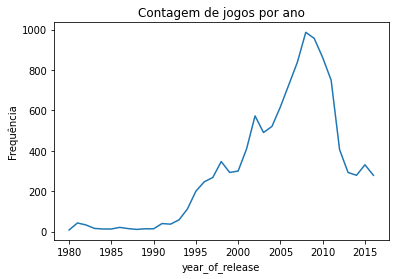

In [67]:
# agrupando por ano e contando o número de jogos
df_games = df_games.groupby('year_of_release')['name'].count()

# configurar título e rótulos dos eixos
plt.title('Contagem de jogos por ano')
plt.ylabel('Frequência')

df_games.plot()

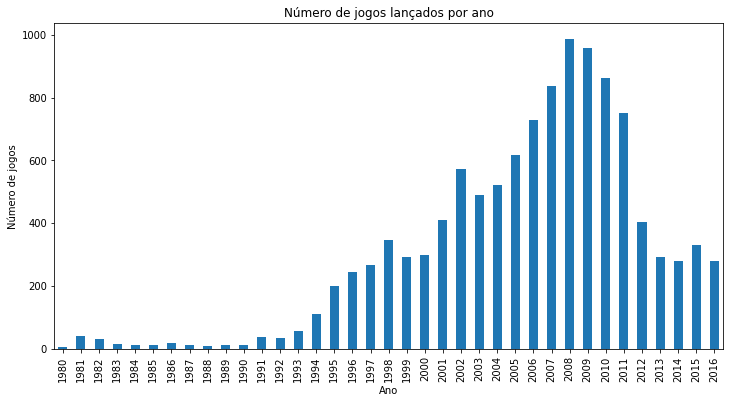

In [68]:
# Plota o gráfico de barras
df_games.plot(kind='bar', figsize=(12,6))

# Configurações do gráfico
plt.title('Número de jogos lançados por ano')
plt.xlabel('Ano')
plt.ylabel('Número de jogos')

plt.show()

In [69]:
# monstrando a df
df_games

year_of_release
1980      8
1981     43
1982     33
1983     16
1984     13
1985     13
1986     21
1987     15
1988     11
1989     14
1990     14
1991     40
1992     37
1993     58
1994    112
1995    200
1996    247
1997    268
1998    347
1999    293
2000    300
2001    410
2002    573
2003    491
2004    521
2005    618
2006    728
2007    838
2008    987
2009    957
2010    862
2011    750
2012    406
2013    293
2014    279
2015    331
2016    279
Name: name, dtype: int64

### Conclusão

O gráfico de barras por ano de lançamento de jogos mostra um aumento significativo na quantidade de jogos lançados a partir dos anos 90 até o final dos anos 2000, onde se atingiu um pico com quase mil jogos lançados em 2008. A partir de então, houve uma queda gradual na quantidade de jogos lançados, mas ainda mantendo uma quantidade significativa de lançamentos até 2016. Esses dados indicam que o mercado de jogos eletrônicos teve um grande crescimento durante as décadas de 90 e 2000, mas que posteriormente entrou em um período de estabilização, com uma quantidade consistente de lançamentos a cada ano.

Pode-se observar que após há uma significância após 1994 onde atinge 3 digitos. Além disso, após o ano de 2009 começou uma queda grande no número de games lançados por ano, demonstrando uma esfriada no mundo de games.

### Vendas por plataforma

Agora iremos gerar os seguintes relatórios:

* vendas compiladas por plataforma
* plataformas com maiores vendas totais --> distribuição de vendas por ano
* ltv (life time value) das plataformas de games e tempo de aparição de novas plataformas

iremos iniciar de cima para baixo.

#### Vendas compiladas por plataforma

In [70]:
# agurpando por plataforma
df_plat = df.groupby('platform')['total_rev'].sum().sort_values(ascending=False).reset_index()

df_plat

,platform,total_rev
0,PS2,1247.16
1,X360,966.61
2,PS3,935.19
3,Wii,903.31
4,DS,804.28
5,PS,727.58
6,PS4,314.14
7,GBA,313.73
8,PSP,293.57
9,PC,258.86


**Conclusão Intermediária**

A partir da análise dos dados, podemos perceber que a plataforma PS2 foi a que mais gerou receita, totalizando um valor de 1247.16 milhões de dólares. Em seguida, temos X360 com 966.61 milhões de dólares e PS3 com 935.19 milhões de dólares. 

Entre as plataformas mais recentes, destaca-se o PS4 com um total de 314.14 milhões de dólares, seguido pelo Xbox One com 159.32 milhões de dólares. Vale ressaltar que o PC também apresentou um valor considerável de receita, com um total de 258.86 milhões de dólares. 

Por outro lado, podemos observar que algumas plataformas apresentaram valores de receita bem inferiores, como é o caso do PCFX, GG, 3DO e TG16, que geraram menos de 1 milhão de dólares cada uma. 

Portanto, podemos concluir que as plataformas mais populares e consolidadas no mercado tendem a gerar mais receita, enquanto as menos conhecidas e/ou obsoletas tendem a ter valores mais baixos.

É possível perceber que como a receita dos jogos cresceu com o tempo, os consoles com entre o 'golden_age'da criação de games também foi a que mais deu certo. O consoles mais antigos foram os que geraram menos receita. 

É importante ver que um dos consoles de geração até que nova o WiiU pode ser considerado um fracasso, pela sua receita em comparação com os consoles da mesma geração.

Agora iremos escolher nosso top 10 plataformas, ou seja, até a plataforma do PC para games. Iremos gerar um gráfico de distribuição por ano para cada um dos tipos de console.

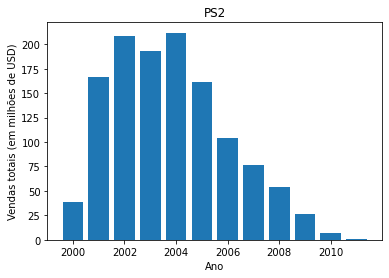

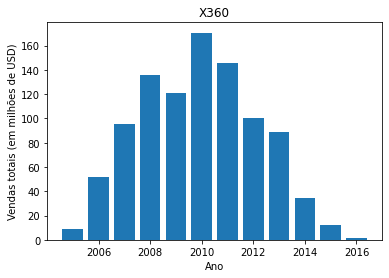

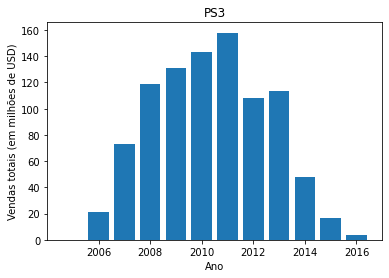

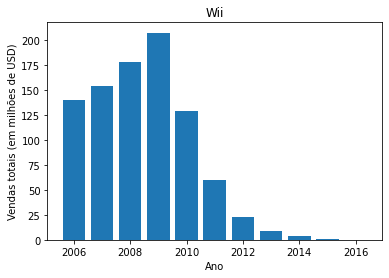

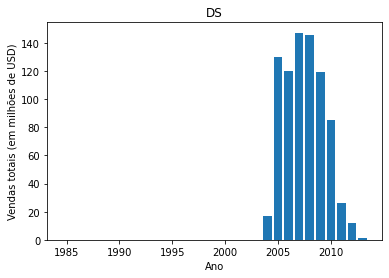

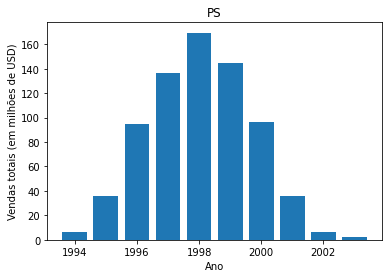

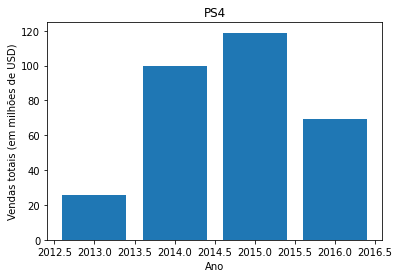

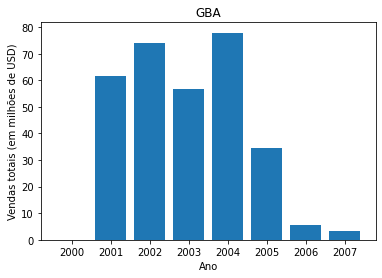

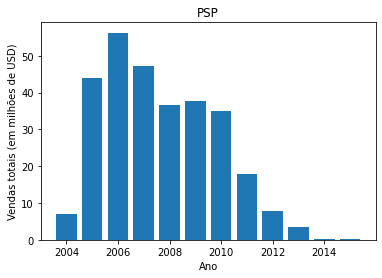

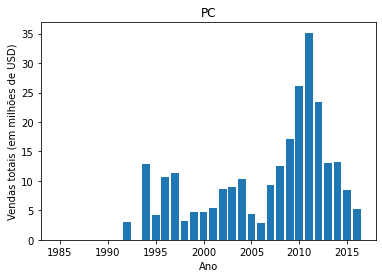

In [71]:
# seleciona as 10 plataformas com maiores vendas
top_platforms = df_plat['platform'].head(10)

# itera pelas plataformas e plota o gráfico de distribuição por ano
for platform in top_platforms:
    # filtra o dataframe pela plataforma atual
    df_platform = df[df['platform'] == platform]
    
    # agrupa por ano e soma as vendas totais
    df_year = df_platform.groupby('year_of_release')['total_rev'].sum()
    
    # plota o gráfico de distribuição
    plt.figure()
    plt.title(platform)
    plt.bar(df_year.index, df_year.values)
    plt.xlabel('Ano')
    plt.ylabel('Vendas totais (em milhões de USD)')
    
plt.show()

In [72]:
# média de anos presentes

# Selecionar as linhas correspondentes às top 10 plataformas
df_top_platforms = df[df['platform'].isin(top_platforms)]

# Calcular a média de anos
unique_year = df_top_platforms.groupby(by='platform')['year_of_release'].nunique().reset_index()

print(unique_year['year_of_release'].mean())

11.8


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  int64  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     9035 non-null   float64
 9   user_score       8639 non-null   float64
 10  rating           10305 non-null  object 
 11  total_rev        16567 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


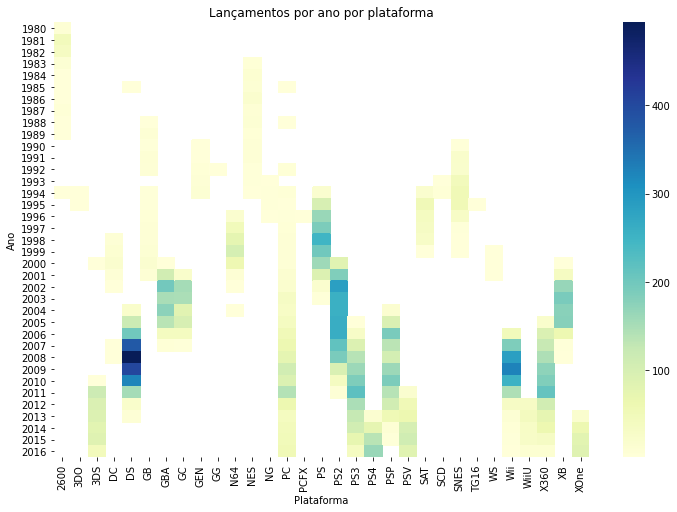

In [74]:
# heatmap de lançamentos - v2

# criando a tabela pivô
pivot = df.pivot_table(values='name', index='year_of_release', columns='platform', aggfunc='count')

# criando figura e subplots
fig, ax = plt.subplots(figsize=(12, 8))

# criando o mapa de calor
sns.heatmap(pivot, cmap='YlGnBu')

# configurando o título e os rótulos dos eixos
plt.title('Lançamentos por ano por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ano')

# exibindo o gráfico
plt.show()

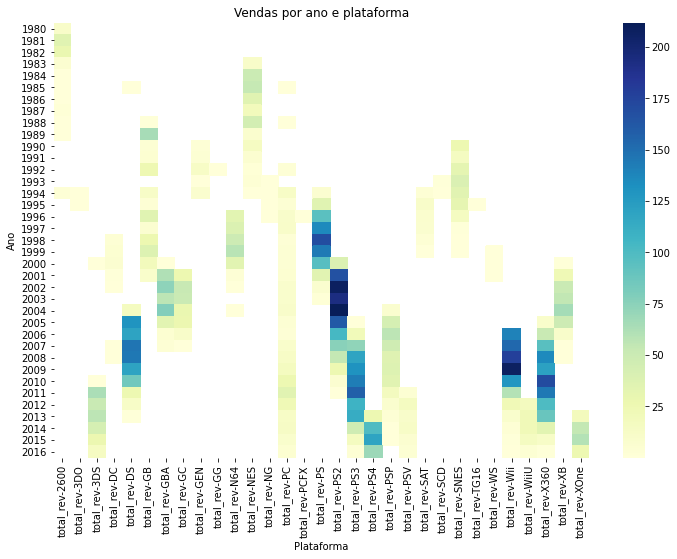

In [75]:
# heatmap de vendas por plataforma - v2

# criando tabela dinâmica com as vendas totais por ano e plataforma
pivot = pd.pivot_table(df, values=['total_rev'],
                       index='year_of_release', columns='platform', aggfunc=sum)

# criando figura e subplots
fig, ax = plt.subplots(figsize=(12, 8))

# gerando mapa de calor
sns.heatmap(pivot, cmap='YlGnBu')

# configurando título e rótulos dos eixos
plt.title('Vendas por ano e plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ano')

# exibindo o gráfico
plt.show()


**Conclusão**

Por meio da análise dos gráficos de distribuição podemos observar que:

* As 10 plataformas mais famosas em vendas de games;
* As plataformas que eram famosas mais não tem mais venda de games registradas em 2016 são --> DS, Wii, PS2, PS, GBA,PSP.
* A média de anos que um console fica presente e vendendo games é de, aproximadamente, 12 anos. Se considerarmos que sem a plataforma do PC esse número deve cair entre 9 a 10 anos.
* Ao analisar os consoles do tipo PS (Playstation) podemos ver que após o lançamento de uma nova geração, o velho console leva, aproximadamente, 7 anos para desaparecer.

### Clusterizando - Dados interessantes de plataformas

Aqui iremos separar nossos dados por ordem de relevância pensando em uma base dados que nos daria possibilidade de gerar uma projeção para 2017. 

Para tal, iremos usar os insights anteriores em que sabemos que após 7 anos os consoles começam a desaparecer. Assim, como nossa base de dados possui anos até 2016, iremos coletar somente dados após 2009 para as próximas análises e armazenar em uma nova df.

In [76]:
# criando nova df
new_df = df.query('year_of_release >= 2011')

new_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_rev
16,grand theft auto v,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,grand theft auto v,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,call of duty: modern warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
31,call of duty: black ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,None,14.63
33,pokemon x/pokemon y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,None,14.60
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,strawberry nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,None,0.01
16707,aiyoku no eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,None,0.01
16710,samurai warriors: sanada maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,None,0.01
16712,haitaka no psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,None,0.01


In [77]:
# valores únicos em ano
new_df['year_of_release'].unique()

array([2013, 2011, 2015, 2012, 2014, 2016])

### Líder em vendas, em Trend, em Declínio

Com a new_df gerada anteriormente vamos calcular quais os líderes de venda no período por venda total.

Vamos gerar gráficos de linha para todas as plataformas e analisar quais estão crescendo ou caindo em faturamento de vendas e a lucratividade calculando o ROI (faturamento/número de games).


Vamos gerar os gráficos de linha para as diferentes plataformas.

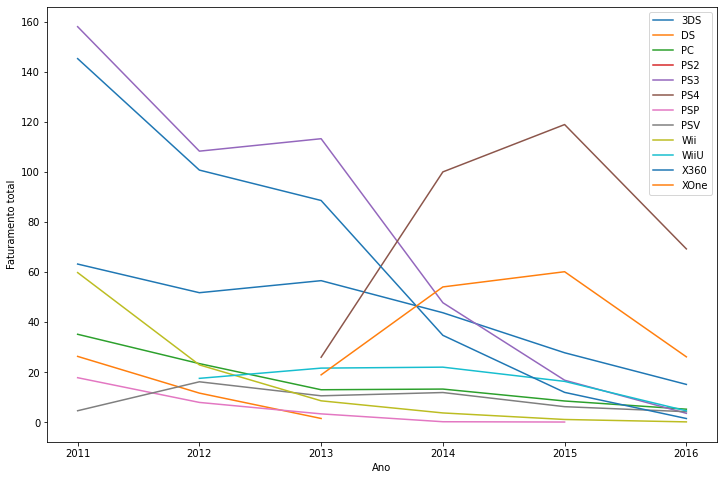

In [78]:
# gerando gráficos e análises - v1
plt.figure(figsize=(12, 8))

# agrupando
grouped_df = new_df.groupby(by=['platform', 'year_of_release'])['total_rev'].sum().reset_index()

# Obtendo a lista de plataformas
platforms = grouped_df['platform'].unique()

# Loop sobre as diferentes plataformas e plotando um gráfico de linha para cada uma delas
for platform in platforms:
    platform_df = grouped_df[grouped_df['platform'] == platform]
    plt.plot(platform_df['year_of_release'], platform_df['total_rev'], label=platform)

# Configurando o gráfico
plt.xlabel('Ano')
plt.ylabel('Faturamento total')
plt.legend()
plt.show()

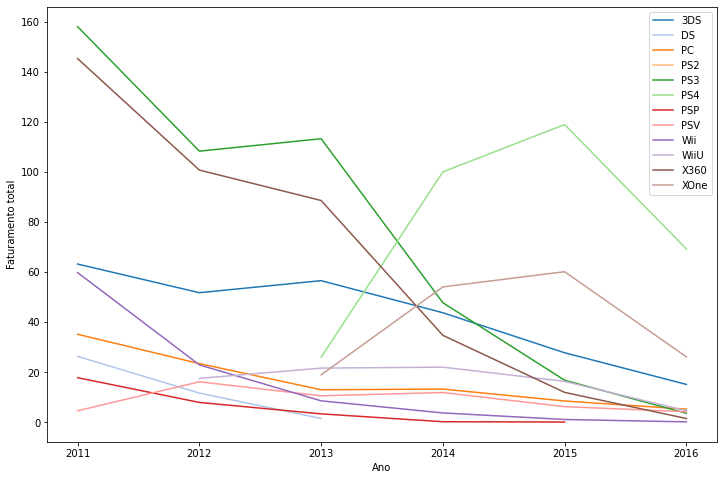

In [79]:
# gerando gráficos e análises - v2
plt.figure(figsize=(12, 8))

# agrupando
grouped_df = new_df.groupby(by=['platform', 'year_of_release'])['total_rev'].sum().reset_index()

# Obtendo a lista de plataformas
platforms = grouped_df['platform'].unique()

# Loop sobre as diferentes plataformas e plotando um gráfico de linha para cada uma delas
for i, platform in enumerate(platforms):
    platform_df = grouped_df[grouped_df['platform'] == platform]
    plt.plot(platform_df['year_of_release'], platform_df['total_rev'], label=platform, color=plt.cm.tab20(i))

# Configurando o gráfico
plt.xlabel('Ano')
plt.ylabel('Faturamento total')
plt.legend()
plt.show()


In [80]:
# agrupando df por total_rev e plataforma
grouped_df2 = new_df.groupby(by='platform')['total_rev'].sum().reset_index().sort_values(by='total_rev', ascending=False)
grouped_df2

,platform,total_rev
4,PS3,447.69
10,X360,382.75
5,PS4,314.14
0,3DS,258.21
11,XOne,159.32
2,PC,98.67
8,Wii,96.39
9,WiiU,82.19
7,PSV,53.81
1,DS,39.54


Agora iremos gerar um diagrama de caixas para as vendas globais por plataforma, vamos analisar as diferenças entre elas.

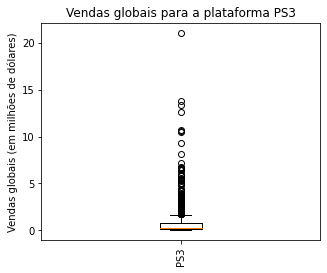

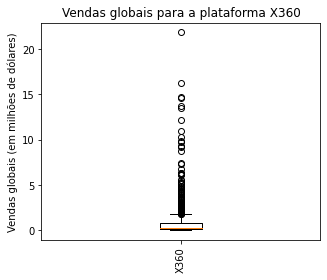

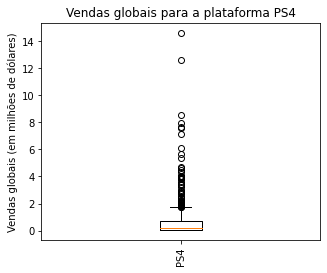

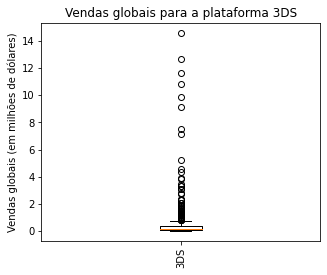

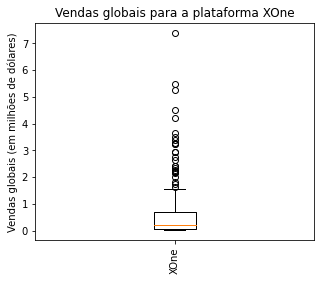

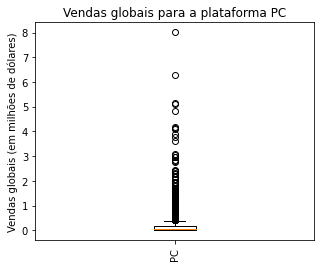

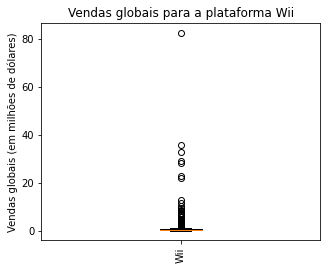

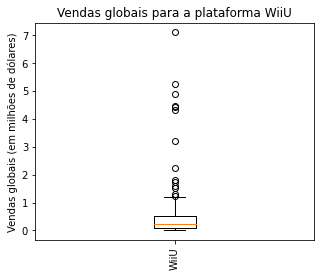

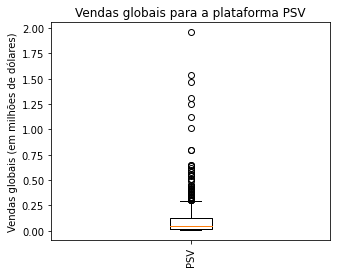

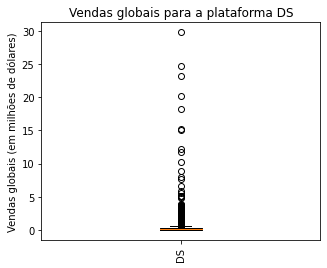

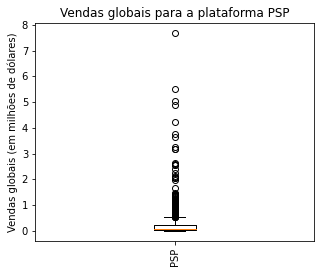

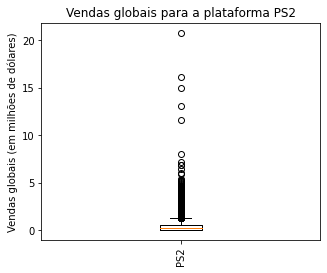

In [81]:
# Agrupar os dados por plataforma e calcular as vendas globais
top_platforms = new_df.groupby('platform')['total_rev'].sum().sort_values(ascending=False)

# Gerar um gráfico de boxplot para cada plataforma
for platform, total_rev in top_platforms.items():
    # Selecionar as vendas globais da plataforma atual
    data = df.loc[df['platform'] == platform, 'total_rev']
    
    # Gerar o boxplot para a plataforma atual
    fig, ax = plt.subplots(figsize=(5, 4))
    ax.boxplot(data)
    
    # Configurar o eixo y
    ax.set_ylabel('Vendas globais (em milhões de dólares)')
    
    # Configurar o título e os rótulos do eixo x
    ax.set_title('Vendas globais para a plataforma ' + platform)
    ax.set_xticklabels([platform], rotation=90)
    
    # Mostrar o gráfico
    plt.show()

In [82]:
# calculando a média por plataforma
# Agrupar os dados por plataforma e calcular as vendas globais
mean_platform = new_df.groupby('platform')['total_rev'].mean().sort_values(ascending=False).reset_index()
mean_platform

,platform,total_rev
0,PS4,0.801378
1,X360,0.756423
2,XOne,0.645020
3,PS3,0.627896
4,WiiU,0.559116
5,3DS,0.503333
6,Wii,0.479552
7,PC,0.249167
8,DS,0.211444
9,PSV,0.125431


**Conclusão**

Podemos observar pelo gráfico gerado que:

* O líder de vendas para o período é o PS3 seguido do X360;
* Pelos gráficos gerados pode-se observar que o faturamento para todos os consoles estão caindo;
* Apesar da queda os consoles em certo crescimento são o PS4 e XOne;
* Todas as outras plataformas estão em queda ou perto da estagnação ao longo do tempo.
* Pelos gráficos de distribuição pode-se perceber que a maior parte das plataformas tem vendas variantes muito perto da média, mas todas com um grande número de outliers mostrado for do bigode superior;
* As plataformas PSV/WiiU/XOne/Ps4 são as que tem o maior box, mostrando maior dispersão das vendas.
* No quesito de rentabilidade e média de faturamento por plataforma, pode-se observar que os consoles do PS4 e X360, analisando o gráfico de linhas porém, pode-se perceber que o XOne está em crescimento e considerando a média de faturamento pode ser considerado junto com o PS4 potencialmente lucrativos, pois estão em crescimento e sua média de faturamento é alta.

### Correlação entre avaliações de usuários e profissionais e vendas e sua dispersão

Nesta seção do notebook, vamos explorar a relação entre as avaliações de usuários e profissionais e as vendas de uma plataforma popular. Iremos escolher a plataforma com maior número de games possíveis, para termos uma idéia estatística melhor.

Para começar, vamos construir um gráfico de dispersão que mostre a relação entre as avaliações e as vendas. Um gráfico de dispersão é uma forma de visualizar a relação entre duas variáveis. Através do gráfico, podemos identificar se há uma tendência ou padrão na relação entre as avaliações e as vendas.

Sabendo que temos dados nulos nas colunas de revisões, iremos criar dataframes novas retirando os nulos da análise.

In [83]:
# encontrando os líderes em jogos por plataforma
count_plat = new_df.groupby('platform')['name'].count().sort_values(ascending = False)
count_plat

platform
PS3     713
3DS     513
X360    506
PSV     429
PC      396
PS4     392
PSP     314
XOne    247
Wii     201
DS      187
WiiU    147
PS2       7
Name: name, dtype: int64

Por meio da análise iremos trabalhar com a plataforma do PS3 que há mais dados disponíveis para os próximos testes.

#### critic_score

In [84]:
# copiando df
df_critic = new_df[new_df['platform'] == 'PS3'].copy()

# verificando a df
df_critic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 713 entries, 16 to 16710
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             713 non-null    object 
 1   platform         713 non-null    object 
 2   year_of_release  713 non-null    int64  
 3   genre            713 non-null    object 
 4   na_sales         713 non-null    float64
 5   eu_sales         713 non-null    float64
 6   jp_sales         713 non-null    float64
 7   other_sales      713 non-null    float64
 8   critic_score     457 non-null    float64
 9   user_score       469 non-null    float64
 10  rating           487 non-null    object 
 11  total_rev        713 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 72.4+ KB


Correlation:  0.3482570864954948


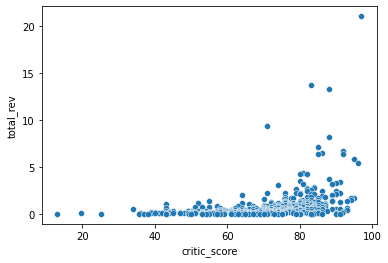

In [85]:
# gerando gráfico de distribuição
sns.scatterplot(data=df_critic, x='critic_score', y='total_rev')

# calculando a correlação
corr = df_critic[['critic_score', 'total_rev']].corr()
print('Correlation: ', corr.loc['critic_score', 'total_rev'])

**Conclusão**

Podemos observar que:

* A correlação entre a critica dos profissionais e as vendas é de 0,39 aproximadamente, mostrando uma correlação positiva moderada.Isso significa que à medida que uma variável aumenta, a outra tende a aumentar também, mas não necessariamente na mesma proporção. Uma correlação de 0.38 está mais próxima de uma correlação fraca do que de uma correlação forte, mas ainda indica uma relação significativa entre as duas variáveis.

* Uma correlação de 0.38 entre as revisões dos críticos e as vendas totais dos jogos indicaria que há uma tendência de que os jogos com revisões mais positivas dos críticos tendam a ter vendas mais altas, embora a relação não seja muito forte.

* Pelo gráfico de distribuição podemos observar que, de fato, ao aumentar critic_score há um aumento no total_rev, mas que também não é necessariamente um aumento, pois há muitos pontos em que o score é alto mas o total_rev fica baixo ou não aumenta em comparação com outros.


* Também, é possível ver que games com score baixo tendem a ter um faturamento baixo e é possível comprovar pela parte incial esquerda do gráfico de distribuição.

Assim, com aumento do critic score há uma tendência de aumento das vendas.

#### user_score

Correlation:  0.02717994636065354


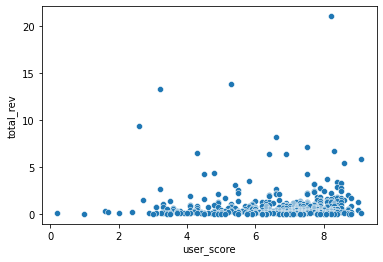

In [86]:
# gerando gráfico de distribuição
sns.scatterplot(data=df_critic, x='user_score', y='total_rev')

# calculando a correlação
corr = df_critic[['user_score', 'total_rev']].corr()
print('Correlation: ', corr.loc['user_score', 'total_rev'])

Podemos observar que:

* A correlação de 0.097 indica uma correlação positiva muito fraca entre as duas variáveis. Isso significa que há uma relação, mas é muito fraca e não há uma relação clara entre as variáveis. 

* A correlação de 0.097 entre as revisões dos usuários e as vendas totais dos jogos indica que há pouca ou nenhuma relação entre as revisões dos críticos e as vendas totais dos jogos. Em outras palavras, a revisão dos usuários provavelmente não é um bom indicador do desempenho de vendas do jogo.

* Pelo gráfico de distribuição podemos observar que em alguns casos que não há uma clareza entre a revisão dos usuários e total_rev, sendo que pelo gráfico de distribuição temos pontos aleatórios em diferentes scores. Pode-se ver ainda, que ao aumentar o score há sim a incidência de maior vendas, mas não é clara e não é um padrão.

* Também, é possível ver que games com score baixo tendem a ter um faturamento baixo e é possível comprovar pela parte incial esquerda do gráfico de distribuição.

Assim, não podemos afirmar com clareza se o user_score influência, de fato, para o aumento das vendas, mas que há uma tendência há.

### Comparando os dados com outras plataformas

Iremos gerar os mesmos gráficos e calculos de correlações anteriores para outras plataformas, assim poderemos ter uma comparação. Iremos entender se, de fato, o mesmo fenômeno acontece com as outras plataformas ou somente com PS3.

Para tal, iremos escolher as seguintes plataformas para comparação:

* PS4
* PS2
* PSP
* PC

Escolhemos plataformas da mesma família, também, o PC, pois é o que se apresenta com maior duração de venda de games e não fica obsoleto.

Iremos gerar vários gráficos iguais dos anteriores.

In [87]:
# gerando lista de plataformas
plat_list = ['PSP', 'PS2', 'PS3', 'PS4', 'PC']

Correlation of PSP:  0.03164840595347944
Correlation of PS2:  0.547272669078396
Correlation of PS3:  0.3482570864954948
Correlation of PS4:  0.3908899363117363
Correlation of PC:  0.3085778768056041


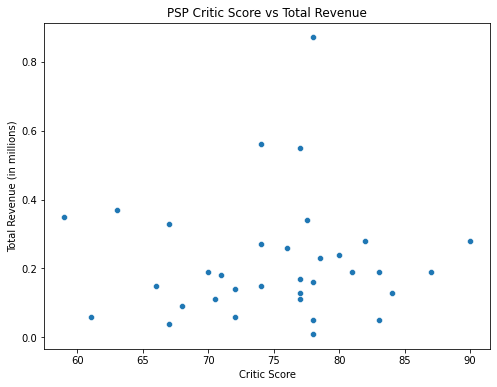

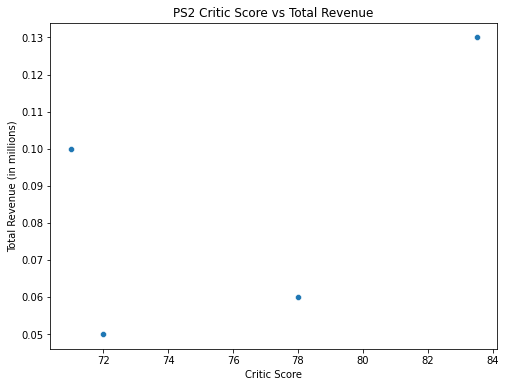

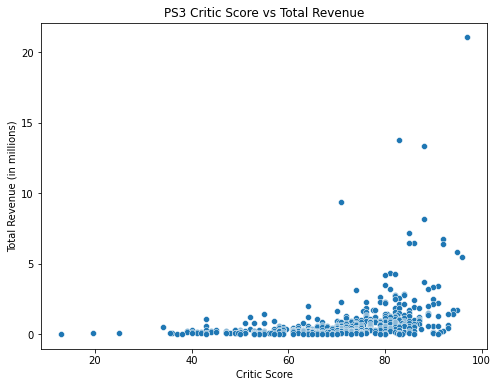

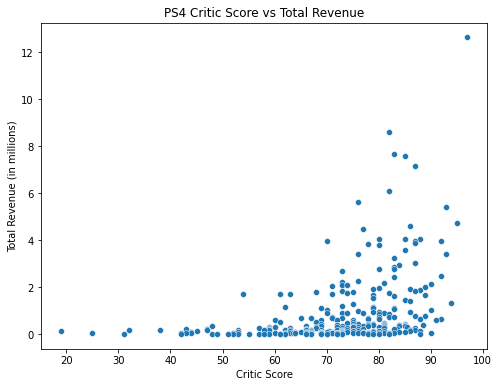

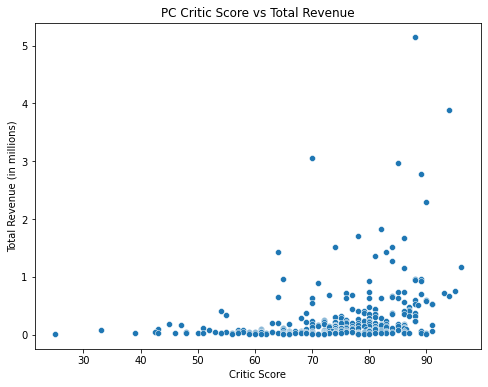

In [88]:
# loop for e geração de gráficos de critic_score

for plat in plat_list:
    # Gerando gráfico de distribuição
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.scatterplot(data=new_df[new_df['platform'] == plat], x='critic_score', y='total_rev', ax=ax)

    # Calculando a correlação
    corr = new_df[new_df['platform'] == plat][['critic_score', 'total_rev']].corr()
    print(f'Correlation of {plat}: ', corr.loc['critic_score', 'total_rev'])

    # Configurando títulos e labels
    ax.set_title(f"{plat} Critic Score vs Total Revenue")
    ax.set_xlabel("Critic Score")
    ax.set_ylabel("Total Revenue (in millions)")

Correlation of PSP:  -0.07575831950421279
Correlation of PS2:  -0.4355206206379058
Correlation of PS3:  0.02717994636065354
Correlation of PS4:  -0.02086201340247758
Correlation of PC:  -0.05116900003785846


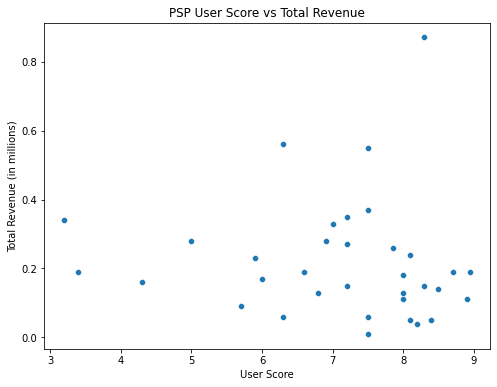

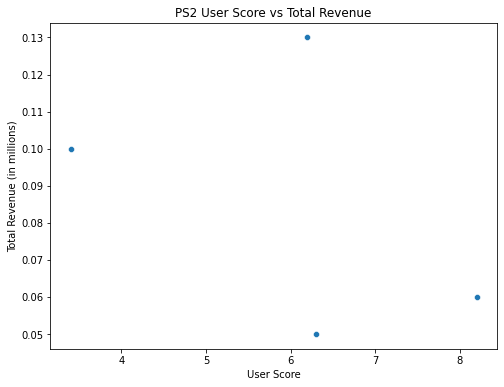

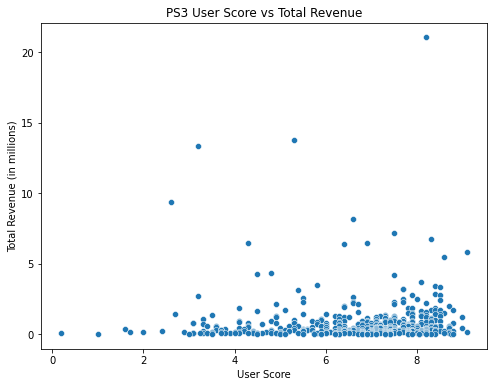

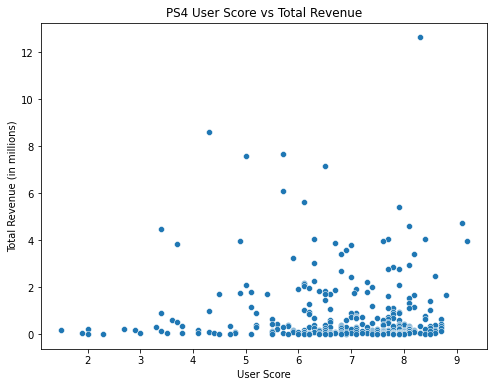

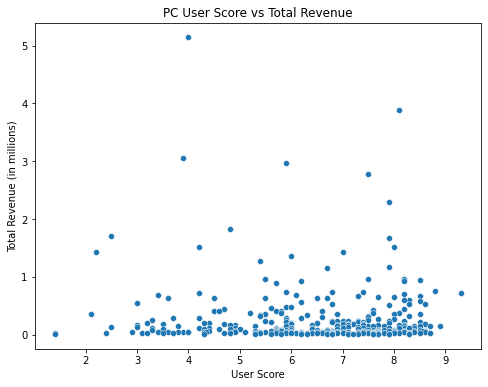

In [89]:
# loop for e geração de gráficos de user_score

for plat in plat_list:
    # Gerando gráfico de distribuição
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.scatterplot(data=new_df[new_df['platform'] == plat], x='user_score', y='total_rev', ax=ax)

    # Calculando a correlação
    corr = new_df[new_df['platform'] == plat][['user_score', 'total_rev']].corr()
    print(f'Correlation of {plat}: ', corr.loc['user_score', 'total_rev'])

    # Configurando títulos e labels
    ax.set_title(f"{plat} User Score vs Total Revenue")
    ax.set_xlabel("User Score")
    ax.set_ylabel("Total Revenue (in millions)")

**Conclusões**

Por meio dos graficos gerados podemos perceber os seguintes pontos:

* Para as plataformas de comparação escolhidas a ligação do critic_score com as vendas não demonstram correlação forte para nenhuma das plataformas.

* Para as plataformas de comparação escolhidas a ligação do user_score com as vendas não demonstram correlação forte para nenhuma das plataformas.

* Como usamos plataformas da mesma família (PS) é possível observar que nem as críticas dos usuários e profissionais não afetam nem com o passar das gerações as vendas dos games de maneira consistente, ou seja, não é um fato relevante para tal.

* Ao análisar os dados do PC podemos ver que a plataforma mais consistente, ou seja, a que conseguiu vender games por mais tempo no mercado também não apresenta tal característica, ainda mais, que apresenta correlação de certa maneira negativa.

* Os dados nos gráficos de dispersão estão muito distribuidos isso demonstra uma variância grande e que não há uma ligação clara entre as variáveis.

### Top sales e distribuição de games - Análise de games por gênero

Iremos agora analisar os gêneros de games, suas vendas e sua distribuição para nossa new_df gerada.

Para tal, iremos retirar dados duplicados dos nomes dos games. Assim, iremos ter uma ideia melhor da quantidade de games por gêneros que são criados.

Além disso, para análise de lucratividade e do que vende mais iremos agrupar os dados por gênero e total_rev para entender o que gera mais renda no geral no mercado.

In [90]:
# Análise da distribuição dos games por gênero

# criando nova df sem duplicados em name
new_df2 = new_df.drop_duplicates(subset = 'name')

# agrupando por contagem de games por gênero
new_df2.groupby(by='genre')['genre'].count().sort_values(ascending = False)

genre
Action          694
Role-Playing    340
Adventure       303
Misc            271
Sports          160
Shooter         149
Simulation      110
Strategy         96
Fighting         87
Racing           74
Platform         71
Puzzle           63
Name: genre, dtype: int64

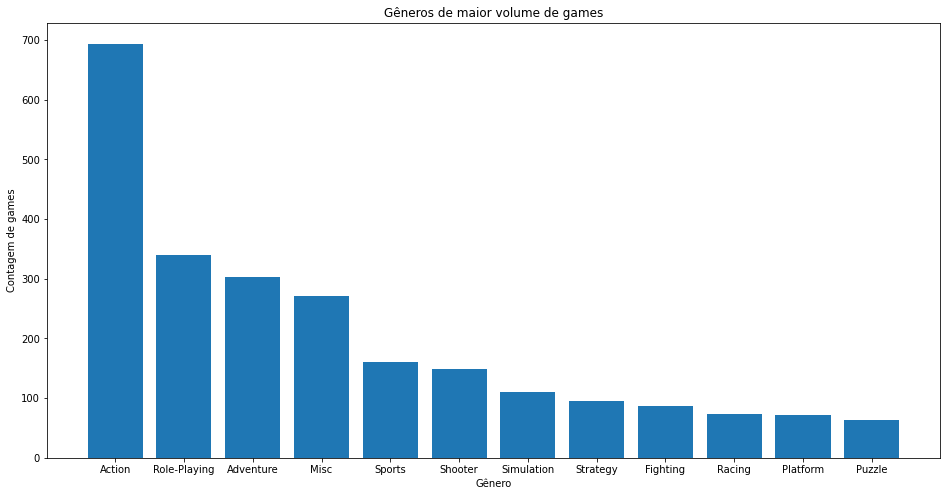

In [91]:
# gerando gráficos de barras
bar1 = new_df2.groupby(by='genre')['name'].count().sort_values(ascending = False).reset_index()

# gerando gráficos e análises
plt.figure(figsize=(16, 8))

# criar o gráfico de barras
plt.bar(bar1['genre'], bar1['name'])

# adicionar título e labels aos eixos
plt.title('Gêneros de maior volume de games')
plt.xlabel('Gênero')
plt.ylabel('Contagem de games')

# mostrar o gráfico
plt.show()


In [92]:
# Análise de geração de vendas por gênero

new_df.groupby('genre')['total_rev'].sum().sort_values(ascending = False).reset_index()

,genre,total_rev
0,Action,565.22
1,Shooter,402.96
2,Role-Playing,245.63
3,Sports,237.40
4,Misc,139.91
5,Platform,88.68
6,Racing,88.31
7,Fighting,66.90
8,Simulation,50.26
9,Adventure,45.04


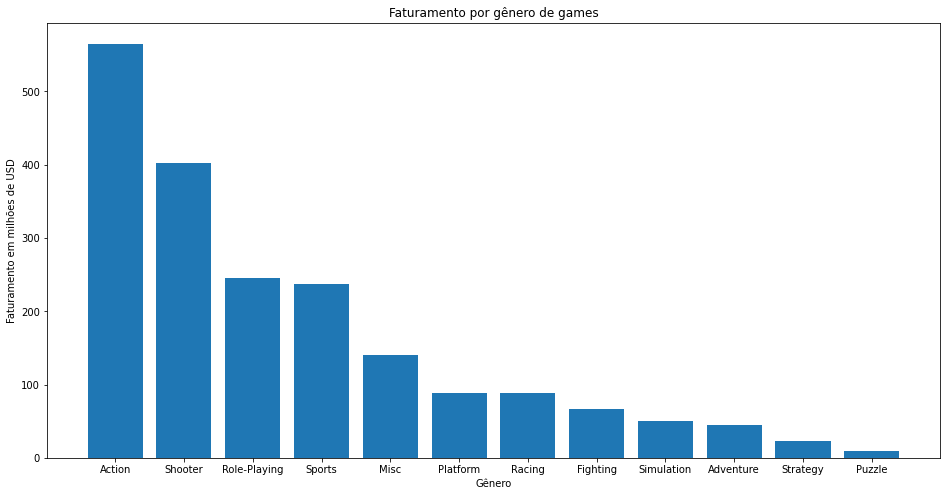

In [93]:
# gerando gráficos de barra
bar2 = new_df.groupby('genre')['total_rev'].sum().sort_values(ascending = False).reset_index()

# gerando gráficos e análises
plt.figure(figsize=(16, 8))

# criar o gráfico de barras
plt.bar(bar2['genre'], bar2['total_rev'])

# adicionar título e labels aos eixos
plt.title('Faturamento por gênero de games')
plt.xlabel('Gênero')
plt.ylabel('Faturamento em milhões de USD')

# mostrar o gráfico
plt.show()

In [94]:
# calculando lucratividade (caixa / número de games)

# dividindo
genre_avg_rev = new_df.groupby('genre')['total_rev'].sum().sort_values(ascending = False).div(new_df2.groupby(by='genre')['genre'].count().sort_values(ascending = False))

# resultado em ordem
genre_avg_rev_sorted = genre_avg_rev.sort_values(ascending=False)

# Imprimindo resultados
print(genre_avg_rev_sorted)

genre
Shooter         2.704430
Sports          1.483750
Platform        1.249014
Racing          1.193378
Action          0.814438
Fighting        0.768966
Role-Playing    0.722441
Misc            0.516273
Simulation      0.456909
Strategy        0.234479
Puzzle          0.156349
Adventure       0.148647
dtype: float64


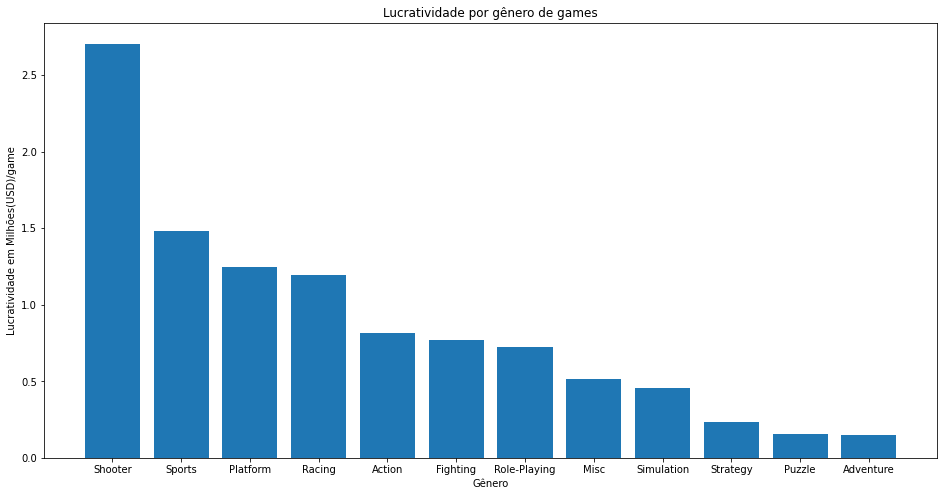

In [95]:
# gerando gráfico de barras
bar3 = genre_avg_rev_sorted.reset_index()

# gerando gráficos e análises
plt.figure(figsize=(16, 8))

# criar o gráfico de barras
plt.bar(bar3['genre'], bar3[0])

# adicionar título e labels aos eixos
plt.title('Lucratividade por gênero de games')
plt.xlabel('Gênero')
plt.ylabel('Lucratividade em Milhões(USD)/game')

# mostrar o gráfico
plt.show()



**Conclusão** 

Com base nos dados fornecidos, é evidente que a indústria de jogos é dominada pelos gêneros de ação, misc e aventura. No entanto, em termos de receita, os jogos de tiro parecem ser os mais lucrativos, com uma média de 2,21 milhões de dólares por jogo. Jogos de plataforma e esportes também tendem a gerar alta receita por jogo. Por outro lado, jogos de aventura e quebra-cabeça têm a menor receita por jogo, apesar de serem gêneros populares. Essas descobertas sugerem que os desenvolvedores de jogos devem considerar a lucratividade dos gêneros ao desenvolver novos jogos. No entanto, é importante notar que a receita não é o único fator a ser considerado, já que o engajamento e a satisfação do usuário também são cruciais para o sucesso de um jogo.

## Perfil por região - US, UE, JP

Nesta seção vamos analisar alguns dados importantes da indústria de videogames. Para começar, vamos estudar as cinco principais plataformas e como suas quotas de mercado variam de região para região. Isso nos permitirá entender melhor as preferências dos jogadores em diferentes partes do mundo.

Em seguida, vamos explorar os cinco principais gêneros de jogos e entender suas diferenças. Isso nos ajudará a compreender quais são os gêneros mais populares entre os jogadores e como eles influenciam as vendas.

Por fim, vamos investigar se as classificações do ESRB (Entertainment Software Rating Board) afetam as vendas em regiões individuais. Sabemos que o ESRB é responsável por classificar os jogos com base na idade recomendada para jogadores, e isso pode influenciar a compra de jogos em diferentes regiões. Vamos analisar se essas classificações têm impacto nas vendas e entender como elas podem variar entre as regiões.


Vamos começar da seguinte maneira:

* 		Vendo as cinco plataformas principais. Descrevendo as variações das suas quotas de mercado de região para região.

* 		Analisando os cinco principais gêneros. Explique a diferença.

* 		Entendendo se as classificações do ESRB afetam as vendas em regiões individuais?

### Top 5 platafromas por região.

Iremos analisar as plataformas com maior uso para cada região (JP/US/EU) e analisar suas variações entre regiões.

Nesta seção iremos utilizar a df completa.

In [96]:
# Agrupando os dados por plataforma e na_sales
na_sales = df.groupby('platform')['na_sales'].sum().sort_values(ascending = False).reset_index()

na_sales.head(5)

,platform,na_sales
0,X360,599.15
1,PS2,580.09
2,Wii,494.01
3,PS3,391.60
4,DS,381.38


In [97]:
# Agrupando os dados por plataforma e eu_sales
eu_sales = df.groupby('platform')['eu_sales'].sum().sort_values(ascending = False).reset_index()

eu_sales.head(5)

,platform,eu_sales
0,PS2,337.05
1,PS3,328.97
2,X360,269.79
3,Wii,261.48
4,PS,212.39


In [98]:
# Agrupando os dados por plataforma e jp_sales
jp_sales = df.groupby('platform')['jp_sales'].sum().sort_values(ascending = False).reset_index()

jp_sales.head(5)

,platform,jp_sales
0,DS,175.02
1,PS,139.78
2,PS2,137.74
3,SNES,116.55
4,3DS,100.64


**Conclusão**

A partir dos dados gerados podemos concluir que:

* A plataforma do Playstation está presente em todas as regiões em sempre aparece entre o top 3 de vendas em todas as regiões, demonstrando sua força e popularidade ao redor do mundo.

* Pode-se observar que o xbox é mais famoso no mundo ocidental, com Europa e NA tendo em seu top 5 as vendas. No japão a mesma plataforma não aparece.

* Como o Xbox o Nintendo Wii também segue a mesma tendência do Xbox tendo sua venda pertinente no ocidente.

* Podemos ver que no Japão as plataformas que mais performam são da Nintendo, com o Nintendo DS, 3DS e Super nintendo entre o top 5, sendo que a mesma penetração não pode ser vista no mercado ocidental.

* É interessante ver como diferentes empresas estão enraizadas em diferentes partes do mundo, como a Microsoft no Ocidente e Nintendo no Oriente. A Sony é a única capaz de popularizar no mundo inteiro, podendo ser considerada a mais famosa e de maior aderência.


### Top 5 generos por região.

Iremos analisar os genêros com maior uso para cada região (JP/US/EU) e analisar suas variações entre regiões.

Nesta seção iremos utilizar a df completa.

In [99]:
# Agrupando os dados por plataforma e na_sales
na_sales = df.groupby('genre')['na_sales'].sum().sort_values(ascending = False).reset_index()

na_sales.head(5)

,genre,na_sales
0,Action,873.70
1,Sports,681.69
2,Shooter,590.35
3,Platform,444.44
4,Misc,401.69


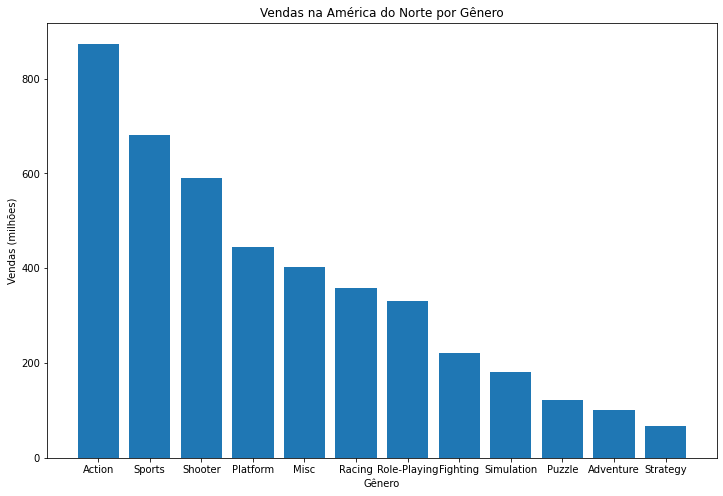

In [100]:
# gerando gráficos e análises
plt.figure(figsize=(12, 8))

# criar o gráfico de barras
plt.bar(na_sales['genre'], na_sales['na_sales'])

# adicionar título e labels aos eixos
plt.title('Vendas na América do Norte por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Vendas (milhões)')

# mostrar o gráfico
plt.show()

In [101]:
# Agrupando os dados por plataforma e eu_sales
eu_sales = df.groupby('genre')['eu_sales'].sum().sort_values(ascending = False).reset_index()

eu_sales.head(5)

,genre,eu_sales
0,Action,517.58
1,Sports,375.60
2,Shooter,316.96
3,Racing,235.47
4,Misc,211.32


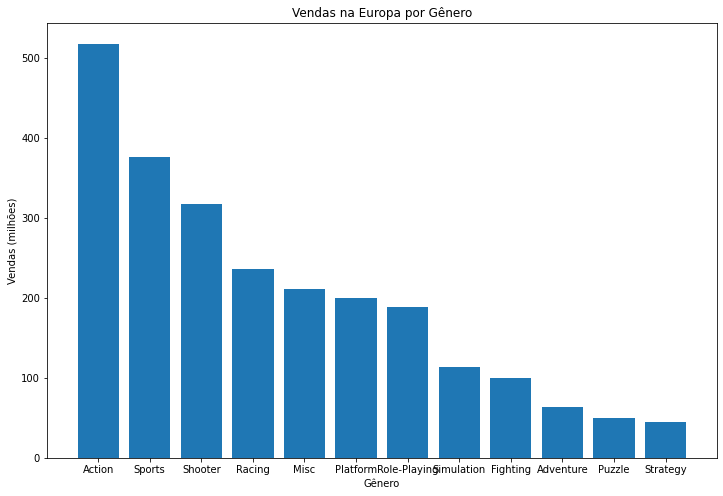

In [102]:
# gerando gráficos e análises
plt.figure(figsize=(12, 8))

# criar o gráfico de barras
plt.bar(eu_sales['genre'], eu_sales['eu_sales'])

# adicionar título e labels aos eixos
plt.title('Vendas na Europa por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Vendas (milhões)')

# mostrar o gráfico
plt.show()

In [103]:
# Agrupando os dados por plataforma e jp_sales
jp_sales = df.groupby('genre')['jp_sales'].sum().sort_values(ascending = False).reset_index()

jp_sales.head(5)

,genre,jp_sales
0,Role-Playing,353.88
1,Action,160.15
2,Sports,135.27
3,Platform,130.71
4,Misc,108.04


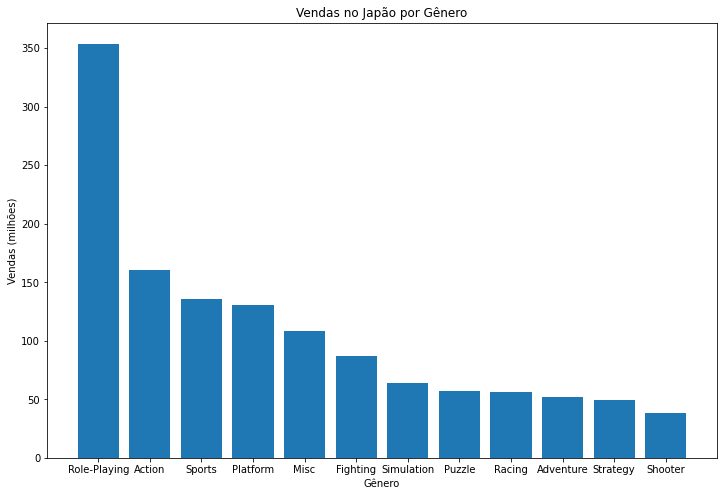

In [104]:
# gerando gráficos e análises
plt.figure(figsize=(12, 8))

# criar o gráfico de barras
plt.bar(jp_sales['genre'], jp_sales['jp_sales'])

# adicionar título e labels aos eixos
plt.title('Vendas no Japão por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Vendas (milhões)')

# mostrar o gráfico
plt.show()

**Conclusão**

Com base nos dados analisados, pode-se observar que os cinco principais gêneros de jogos mais vendidos variam de acordo com a região. Na América do Norte, o gênero Action lidera a lista com 873,70 milhões de dólares em vendas, seguido por Sports e Shooter. Já na Europa, o gênero Action também lidera a lista, mas com 517,58 milhões de dólares em vendas, seguido por Sports e Shooter. No Japão, o gênero Role-Playing ocupa o primeiro lugar com 353,88 milhões de dólares em vendas, seguido por Action e Sports. Observa-se que há diferenças significativas na preferência dos consumidores em cada região, o que pode influenciar na estratégia de marketing e vendas das empresas de jogos.

Além disso, é importante observar que há alguns pontos interessantes entre as regiões ocidentais e orientais, novamente. São elas:

* A gênero de tiros é famoso no ocidente e não no oriente
* O gênero role-playing é o mais famoso no japão e não famoso no ocidente
* O gênero de corrida só é famoso na Europa
* O gênero de ação, esportes e misc são famosos em todos eles. Se analisar globalmente com os dados aí apresentados o gênero de ação seria o mais famoso de maneira geral.

É interessante notar essas diferenças, pois demonstra a diferença entre culturas ocidentais e orientais através da orientação dos dados de games entre diferentes regiões e suas peculiaridades. Além disso, demonstra que a análise destes dados pode ser uma ferramenta importante para empresas de games realizarem estratégias de games.

### ESRB afetam as vendas regionalmente?

Iremos analisar se a classificação ESRB afeta as vendas em diferentes regiões, isso pode demonstrar diferentes características de cada uma das regiões como, por exemplo, as prefências de games, cultura e, em uma análise cega, qual a faixa etária que joga mais games.

Iremos para essa análise criar uma nova df sem dados Nulos em ESRB.

In [105]:
# criando nova df sem nulos em rating
esrb_df = df.dropna(subset=['rating'])
esrb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10305 entries, 0 to 16706
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             10305 non-null  object 
 1   platform         10305 non-null  object 
 2   year_of_release  10305 non-null  int64  
 3   genre            10305 non-null  object 
 4   na_sales         10305 non-null  float64
 5   eu_sales         10305 non-null  float64
 6   jp_sales         10305 non-null  float64
 7   other_sales      10305 non-null  float64
 8   critic_score     8975 non-null   float64
 9   user_score       8577 non-null   float64
 10  rating           10305 non-null  object 
 11  total_rev        10305 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.0+ MB


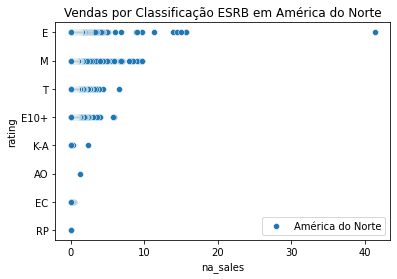

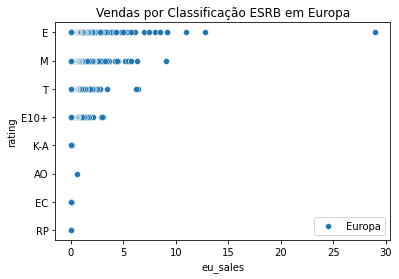

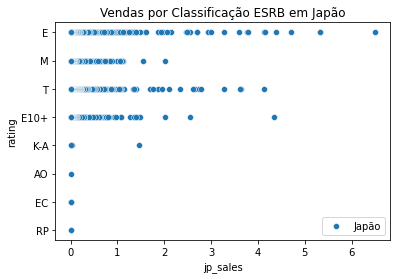

In [106]:
# Criar um dicionário para armazenar as regiões e as colunas de vendas correspondentes
region_dict = {'na_sales': 'América do Norte', 'eu_sales': 'Europa', 'jp_sales': 'Japão'}

# Loop para cada região
for region, region_name in region_dict.items():

    # Criando gráfico de dispersão para América do Norte
    sns.scatterplot(data=esrb_df, x=f'{region}', y='rating', label=f'{region_name}')

    # Adicionando título ao gráfico
    plt.title(f'Vendas por Classificação ESRB em {region_name}')

    # Adicionando legenda ao gráfico
    plt.legend()

    # Exibindo o gráfico
    plt.show()


In [107]:
# Criar um dicionário para armazenar as regiões e as colunas de vendas correspondentes
region_dict = {'na_sales': 'América do Norte', 'eu_sales': 'Europa', 'jp_sales': 'Japão'}

# Loop para cada região
for region, region_name in region_dict.items():
    print(f'Vendas na {region_name} por classificação ESRB:\n')
    # Agrupar os dados por classificação ESRB e calcular as vendas totais da região
    region_sales = esrb_df.groupby('rating')[region].sum().reset_index()
    # Ordenar o dataframe por ordem decrescente de vendas
    region_sales = region_sales.sort_values(by=region, ascending=False)
    # Exibir os resultados
    print(f'{region_sales}\n')

Vendas na América do Norte por classificação ESRB:

  rating  na_sales
1      E   1338.40
7      T    776.05
5      M    767.06
2   E10+    365.00
4    K-A      2.59
3     EC      2.04
0     AO      1.26
6     RP      0.00

Vendas na Europa por classificação ESRB:

  rating  eu_sales
1      E    732.91
5      M    501.18
7      T    441.08
2   E10+    195.14
0     AO      0.61
4    K-A      0.29
3     EC      0.11
6     RP      0.04

Vendas na Japão por classificação ESRB:

  rating  jp_sales
1      E    211.74
7      T    159.68
5      M     67.79
2   E10+     51.44
4    K-A      1.49
0     AO      0.00
3     EC      0.00
6     RP      0.00



**Conclusão**

Por meio dos gráficos e dados gerados acima podemos concluir que o gênero 'E' que significa Everyone é o mais famoso em todas as regiões, mostrando que o maior volume financeiro é destinado a games mais leves e liberados para todos os públicos de certa maneira.

Depois disso seguem os games com T e M que são games Teen e Mature, sendo que aumentam a escala de violência e coisas explicitas. A América do Norte e Japão demonstram mesma tendência onde os games Teen são mais famosos do que os Mature. Já na Europa temos os games Mature performando melhor.

Outro fator importante que pode influenciar as vendas em diferentes regiões é a cultura local. No Japão, jogos com elementos mais leves e gráficos mais coloridos, como os jogos com classificação E, podem ter mais apelo entre os jogadores. Além disso, a indústria de jogos no Japão é conhecida por produzir muitos jogos de RPG, que muitas vezes recebem classificação T, o que pode explicar por que essa classificação é a segunda mais vendida na região.

Em conclusão, pode-se ver que, apesar da pequena diferença da Europa para outras regiões, a classificação ESRB não afeta a venda em diferentes regiões e isso pode ser visto pelo TOP 3 de vendas de cada uma das regiões, sendo populadas pelas mesmas classificações.

## Testes de hipóteses 

Nesta seção do notebook, faremos testes de hipóteses para avaliar se há diferenças significativas entre as classificações médias de usuários em diferentes plataformas e gêneros de jogos. Em particular, estamos interessados em comparar as classificações médias de usuários entre as plataformas Xbox One e PC, e entre os gêneros Action e Sports.

Para isso, usaremos técnicas estatísticas que nos permitirão avaliar se as diferenças nas médias observadas nos dados são estatisticamente significativas, ou seja, se elas são resultado de uma variação aleatória nos dados ou se há evidências suficientes para concluir que as diferenças são reais e não aleatórias. Com essas informações, poderemos fazer inferências sobre as preferências dos usuários em relação a diferentes plataformas e gêneros de jogos

### As classificações médias dos usuários das plataformas Xbox One e PC são as mesmas.

Agora iremos formular nossas hipóteses h0 e h1 e escolher o teste com nosso alfa.

Primeiramente iremos testar a seguinte hipótese:

* As classificações médias dos usuários das plataformas Xbox One e PC são as mesmas.

O teste que escolhemos será:

* Teste t de Student que é utilizado para comparar a diferença entre duas médias de amostras independentes, assumindo que as amostras são aleatórias, independentes e normalmente distribuídas, além disso tem um alto poder estatístico, ou seja, é capaz de detectar diferenças significativas mesmo com amostras relativamente pequenas. Isso faz dele uma opção adequada para muitas situações em que a normalidade e a independência das amostras podem ser assumidas.

O alfa que escolhemos será:

* Alfa ou p-teste de 0,05, pois é um valor comumente utilizado e que significa que a probabilidade de rejeitar a hipótese nula quando ela é verdadeira é de 5%. Sendo 5% um valor muito abaixo.

As hipóteses serão:

* H0: A média das classificações dos usuários da plataforma Xbox One é igual à média das classificações dos usuários da plataforma.
* H1: As médias não são iguais, ou seja, há diferença entre as classificações médias dos usuários entre as duas plataformas.


Os critérios utilizados foram:

* Cálculo das médias das classificações dos usuários para cada plataforma.
* Cálculo das variâncias das classificações dos usuários para cada plataforma.
* Cálculo do desvio padrão das diferenças entre as classificações dos usuários para cada plataforma.
* Cálculo da estatística t usando as médias e o desvio padrão calculados anteriormente.
* Cálculo do valor p usando o teste t de Student para amostras independentes.
* Comparação do valor p com um nível de significância pré-determinado (alfa), geralmente 0.05, para decidir se rejeitamos ou não a hipótese nula.


Iremos criar uma nova df sem os valores nulos para user_score e então realizar nosso teste de hipótese.

In [108]:
# retirando valores nulos em user_score
user_df = df.dropna(subset = ['user_score'])
user_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8639 entries, 0 to 16706
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             8639 non-null   object 
 1   platform         8639 non-null   object 
 2   year_of_release  8639 non-null   int64  
 3   genre            8639 non-null   object 
 4   na_sales         8639 non-null   float64
 5   eu_sales         8639 non-null   float64
 6   jp_sales         8639 non-null   float64
 7   other_sales      8639 non-null   float64
 8   critic_score     8304 non-null   float64
 9   user_score       8639 non-null   float64
 10  rating           8577 non-null   object 
 11  total_rev        8639 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 877.4+ KB


In [109]:
# Separando as colunas de classificações dos usuários para cada plataforma
xbox_scores = user_df[user_df['platform'] == 'XOne']['user_score']
pc_scores = user_df[user_df['platform'] == 'PC']['user_score']

# Calculando as médias das classificações dos usuários para cada plataforma
xbox_mean = xbox_scores.mean()
pc_mean = pc_scores.mean()

# Calculando as variâncias das classificações dos usuários para cada plataforma
xbox_var = xbox_scores.var()
pc_var = pc_scores.var()

# Calculando o desvio padrão das diferenças entre as classificações dos usuários para cada plataforma
std_diff = np.sqrt(xbox_var/len(xbox_scores) + pc_var/len(pc_scores))

# Calculando a estatística t
t = (xbox_mean - pc_mean) / std_diff

# Calculando o valor p
p = ttest_ind(xbox_scores, pc_scores, equal_var=False)[1]
print(p)

# Interpretando o valor p
if p < 0.05:
    print("Rejeita H0 : As médias das classificações dos usuários das plataformas Xbox One e PC não são as mesmas.")
else:
    print("Aceita H0: As médias das classificações dos usuários das plataformas Xbox One e PC são as mesmas.")


6.563828050653724e-05
Rejeita H0 : As médias das classificações dos usuários das plataformas Xbox One e PC não são as mesmas.


**Conclusão Intermediária**

Pode-se observar que as médias das classificações dos usuários das plataformas Xbox One e PC não são as mesmas

Isso é as classificações dos usuários para as duas plataformas são diferentes.

### As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes.

Agora iremos formular nossas hipóteses h0 e h1 e escolher o teste com nosso alfa.

Primeiramente iremos testar a seguinte hipótese:

* As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes.

O teste que escolhemos será:

* Teste t de Student que é utilizado para comparar a diferença entre duas médias de amostras independentes, assumindo que as amostras são aleatórias, independentes e normalmente distribuídas, além disso tem um alto poder estatístico, ou seja, é capaz de detectar diferenças significativas mesmo com amostras relativamente pequenas. Isso faz dele uma opção adequada para muitas situações em que a normalidade e a independência das amostras podem ser assumidas.

O alfa que escolhemos será:

* Alfa ou p-teste de 0,05, pois é um valor comumente utilizado e que significa que a probabilidade de rejeitar a hipótese nula quando ela é verdadeira é de 5%. Sendo 5% um valor muito abaixo.

As hipóteses serão:

* Hipótese nula (H0): não há diferença significativa entre as médias das classificações de usuários para os gêneros Action e Sports.

* Hipótese alternativa (H1): há diferença significativa entre as médias das classificações de usuários para os gêneros Action e Sports.

Vamos usar a última df gerada para a análise

In [110]:
# gerando nossos dados compilados
genre_action = user_df[user_df['genre'] == 'Action']['user_score']
genre_sports = user_df[user_df['genre'] == 'Sports']['user_score']

statistic, pvalue = ttest_ind(genre_action, genre_sports, equal_var=False)
print(f'O valor p é {pvalue} \n')

if pvalue < 0.05:
    print("Rejeitamos a hipótese nula de que as médias das classificações de usuários para os gêneros Action e Sports são iguais.")
else:
    print("Não temos evidências para rejeitar a hipótese nula de que as médias das classificações de usuários para os gêneros Action e Sports são iguais.")


O valor p é 0.05231238988194171 

Não temos evidências para rejeitar a hipótese nula de que as médias das classificações de usuários para os gêneros Action e Sports são iguais.


**Conclusão**

Podemos ver que pelos nossos testes estatísticos que realizamos que as médias de classificações entre XOne e PC são diferentes e não tem uma ligação estatística relevante, isso pode ser visto no valor p obtido, que é muito baixo.

Já para o teste realizado acerca das classificações entre Action e Sports pode-se ver que para nossa análise e base de dados há uma relação e que não há uma diferença significativa entre as classificações médias entre Action e Sports. Iremos retirar esse dado para comprovar ao tirar a média das classificações dos dois gêneros posteriormente.

É importante observar que os testes estatísticos são poderosas ferramentas para se ter uma ideia quando criamos hipóteses e é muito útil para ter um overview inicial sobre o que observamos empiricamente ou temos uma tendência ao ver a base de dados. Assim podemos tirar rapidamente conclusões iniciais utilizando estes métodos.

Iremos, por curiosidade, gerar os dados médios de user_score agrupados por gênero e análisar.

In [111]:
# agrupando df por genero e user_score
user_df.groupby(by='genre')['user_score'].mean()

genre
Action          7.031613
Adventure       7.014023
Fighting        7.285227
Misc            6.770772
Platform        7.234942
Puzzle          7.071034
Racing          7.000720
Role-Playing    7.638188
Shooter         7.028557
Simulation      7.112873
Sports          6.927159
Strategy        7.312928
Name: user_score, dtype: float64

**Conclusão**

De fato, ao análisar as médias de user_score por gênero podemos observar que não há uma diferença relativamente grande entre as notas dos usuários. Assim, demonstramos que nosso teste estava correto.

Além disso, pode-se ver que quase todos os generos tem notas dos usuários parecidas.

## Conclusão geral

Vamos separar nossas conclusões em três seções sendo elas 

(1) Conclusões acerca do processamento de dados e limpeza;

(2) Conclusões acerca da análise de dados;

(3) Clusterização por perfil de usuário por região

(4) Conclusões acerca as hipóteses estatísticas de dados.


Assim temos:

**(1) Conclusão acerca do processamento de dados e limpeza**

Nesta seção  o objetivo foi de corrigir e padronizar os dados da base de jogos eletrônicos. Foram identificadas as colunas que necessitavam de alterações, e foram tomadas medidas para corrigir os tipos de dados.

Foi possível observar que havia muitos nomes diferentes na coluna de jogos, o que tornaria inviável analisá-los um a um. Sendo assim, optou-se por deixar todos os nomes em letras minúsculas, o que facilitaria as análises posteriores.

Também foram identificadas duplicatas implícitas na coluna de plataforma, mas após testes em algumas amostras de nomes, não foi possível perceber esse problema. Em seguida, foram corrigidos os dados da coluna de ano de lançamento, substituindo os valores nulos pela moda dos valores presentes em outras plataformas.

Na coluna de score, foi possível observar uma relação entre os valores nulos das colunas de critic_score e rating, e através da técnica de substituição, foi possível recuperar uma quantidade considerável de dados.

No entanto, ainda há muitos dados faltantes, especialmente na coluna de score, e não foi possível substituí-los devido à falta de informações disponíveis. Portanto, optou-se por deixar esses valores como nulos.

Como foi possível observar a base de dados continha muitos valores nulos para as revisões do usuários, profissionais e ESRB, optou-se por não apagar para não afetar nossas análises posteriores que não necessitavam dessas colunas. Nas colunas necessárias, criou-se uma df alternativa e fez-se a análise sem os valores nulos. 

Tentou-se a técnica de substituição pelo nome para todas as colunas possíveis.


**(2) Conclusões acerca da análise de dados**

Em conclusão, a análise do conjunto de dados de jogos eletrônicos mostrou um aumento significativo no número de jogos lançados dos anos 90 até o final dos anos 2000, com um pico de quase mil jogos lançados em 2008. Desde então, houve uma diminuição gradual no número de jogos lançados, mas ainda com uma quantidade significativa de lançamentos até 2016. Os dados indicam que o mercado de jogos eletrônicos experimentou um crescimento significativo durante os anos 90 e 2000, mas mais tarde entrou em um período de estabilização, com um número consistente de lançamentos a cada ano.

A análise também revelou que as plataformas mais populares e consolidadas no mercado tendem a gerar mais receita, enquanto as menos conhecidas e/ou obsoletas tendem a ter uma receita menor. A análise da distribuição de receita por plataforma também mostrou que as plataformas com a receita mais significativa foram aquelas lançadas durante a "era de ouro" da criação de jogos, enquanto as mais antigas geraram menos receita.

A análise do período mais recente (após 2009) mostrou que o PS3 liderou as vendas, seguido pelo X360. O PS4 e XOne são as únicas plataformas que mostram crescimento, enquanto todas as outras plataformas estão em declínio ou próximas do fim.

A vida média de um console é de aproximadamente 12 anos, e a análise mostrou que após o lançamento de um console de nova geração, o console anterior leva cerca de sete anos para desaparecer do mercado.

Em geral, o mercado de jogos eletrônicos tem sido caracterizado por crescimento e consolidação, com as plataformas mais bem-sucedidas sendo aquelas que foram lançadas durante a era de ouro da criação de jogos. O período mais recente tem sido marcado por estabilidade e a dominação de algumas plataformas, com o PS4 e XOne mostrando o crescimento mais significativo. A análise também destacou a importância de considerar a vida útil dos consoles ao analisar os dados de receita e vendas.


**(3) Clusterização por perfil de usuário por região**

Esta seção analisou alguns dados importantes da indústria de videogames, incluindo as cinco principais plataformas, os cinco principais gêneros de jogos e as classificações do ESRB. Observou-se que as preferências dos jogadores variam significativamente de região para região. A plataforma Playstation aparece entre as três mais vendidas em todas as regiões, enquanto Xbox e Nintendo Wii são mais populares no mundo ocidental. As plataformas da Nintendo têm uma forte penetração no mercado japonês. Em relação aos gêneros, o Action é o mais vendido na América do Norte e Europa, enquanto Role-Playing lidera as vendas no Japão. Os dados também mostraram diferenças nas preferências entre as regiões, com o gênero de tiros sendo mais popular no ocidente, o role-playing no oriente e o gênero de corrida na Europa. O gênero 'E' (Everyone) é o mais popular em todas as regiões, seguido por Teen e Mature.

É interessante observar como as diferentes culturas tendem a mudar a procura por games, podemos ver uma diferença em aspectos do modelo de game que o ocidente e o oriente preferem. Sendo que a Europa e America do Norte tem preferências parecidas já o Japão diferentemente gosta de outros tipos de jogos.

A classificação ESRB não parece ter grande influência entre a venda de games. As plataformas pode-se observar que há uma nítida diferença, as plataformas da Microsoft tem maior incidência no Ocidente, enquanto da Nintendo no Oriente.


**(4) Conclusões acerca as hipóteses estatísticas de dados**

Nesta seção do notebook, realizamos testes de hipóteses para avaliar as diferenças nas classificações médias de usuários entre diferentes plataformas e gêneros de jogos. Usando técnicas estatísticas, avaliamos se as diferenças observadas nos dados são estatisticamente significativas, o que nos permitiu fazer inferências sobre as preferências dos usuários em relação a diferentes plataformas e gêneros de jogos.

No caso da comparação entre as classificações médias de usuários entre as plataformas Xbox One e PC, nossos testes estatísticos mostraram que há diferenças significativas entre as médias, ou seja, as classificações médias dos usuários das duas plataformas são diferentes. Já em relação aos gêneros Action e Sports, nossos testes mostraram que há diferença significativa entre as médias das classificações de usuários para esses gêneros.

Esses resultados são importantes para entender as preferências dos usuários em relação às plataformas e gêneros de jogos, o que pode ser útil para empresas de jogos e desenvolvedores ao criar novos jogos e decidir em quais plataformas lançá-los. Além disso, os testes de hipóteses realizados podem ser úteis para validar teorias e previsões sobre o comportamento dos usuários e, assim, ajudar a tomar decisões informadas em relação aos jogos.